# House Priece Prediction Using Regression Model
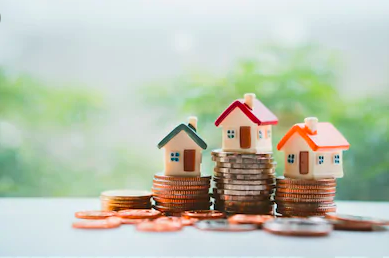

# Name: Abdul Wadood Asim
# Email: abdulwadoodasim456@gmail.com
#LinkedIN:http://www.linkedin.com/in/abdul-wadood-asim
#Internshi company: Digital Empowerment Pakistan
https://digitalempowermentpakistan.com/

# Project Overview
This project aims to develop a predictive model for estimating house prices based on various features. The dataset contains information about houses, including their price, area, number of bedrooms and bathrooms, stories, proximity to main roads, presence of guest rooms, basements, hot water heating, air conditioning, parking, preferred area, and furnishing status. Targeted columns is Price.

By Apply regression techniques, we seek to uncover the relationships between these features and house prices, enabling us to make accurate price predictions for new or unseen houses.

#Key Objectives
**Data Exploration**: Analyze the dataset to understand the distribution of house prices, identify potential outliers, and explore correlations between features.
**Feature Engineering:** Transform or create new features to enhance the model's predictive power (e.g., combining features, handling categorical variables).
**Model Selection: **Evaluate various regression models (linear regression, polynomial regression, decision trees, random forests, etc.) and select the most suitable one based on performance metrics.

**Model Evaluation:** Rigorously assess the final model's accuracy using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²).


In [8]:
import numpy as np
import pandas as pd
import sklearn.preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv('/content/Housing.csv')
df

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                no             yes        2      yes        furnished  
1                no             yes        3       no        furnished  
2                no              no        2      yes   semi-furnished  
3                no             yes        3      yes        furnished  
4                no             yes        2       no        furnished  
..              ...             ...      ...      ...              ...  
540              no              no        2       no      unfurnished  
541              no              no        0       no   semi-furnished  
542              no              no        0       no      unfurnished  
543              no              no        0       no        furnished  
544              no              no        0       no      unfurnished  

[545 rows x 13 columns]

In [11]:
# Sort by 'price' in ascending order
df_sorted = df.sort_values(by='price')

# Sort by 'price' in descending order
df_sorted_desc = df.sort_values(by='price', ascending=False)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [13]:
print('Duplicated sum values:', df.duplicated().sum(), '\n')
print('Missing sum values:')
print(df.isnull().sum())

Duplicated sum values: 0 

Missing sum values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [14]:
df.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [15]:
df.head(3)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished

In [16]:
df.duplicated().sum()


0

In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.shape

(545, 13)

# EDA/ Feature Engineering
**Note:**
*For Visulization UnderStanding*
Le6 mean 10^6
Le7 mean 10^7 etc
for example 4le6
4*10^6= 4000000
this normaly show in high values in different graphs

# Price

<Axes: ylabel='Frequency'>

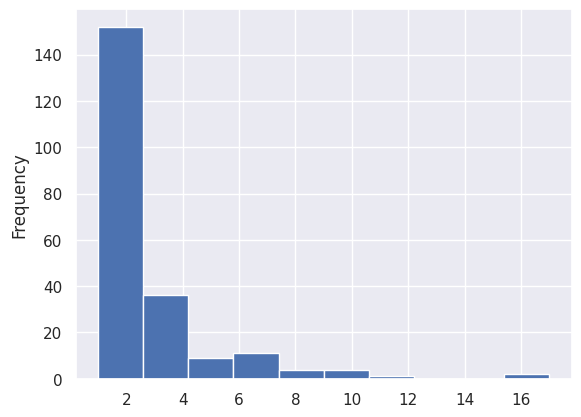

In [19]:
#Plot the first histogram (before normalization)
df['price'].value_counts().plot(kind='hist')


<ipython-input-20-2d33fcd153c9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


Text(0.5, 1.0, 'Price Distribution (Before Normalization)')

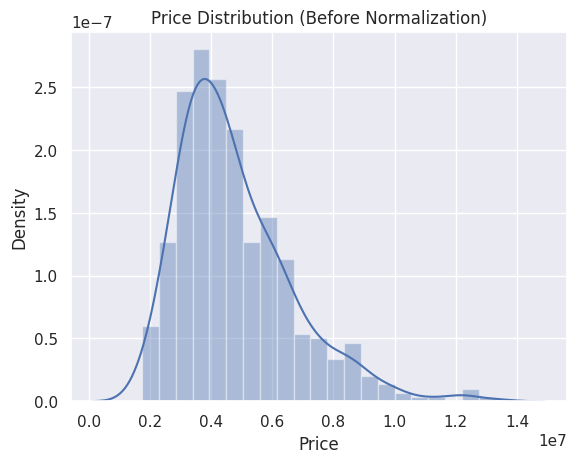

In [20]:

# Plot the first distribution plot (before normalization)
sns.distplot(df['price'])
plt.xlabel('Price')
plt.title('Price Distribution (Before Normalization)')

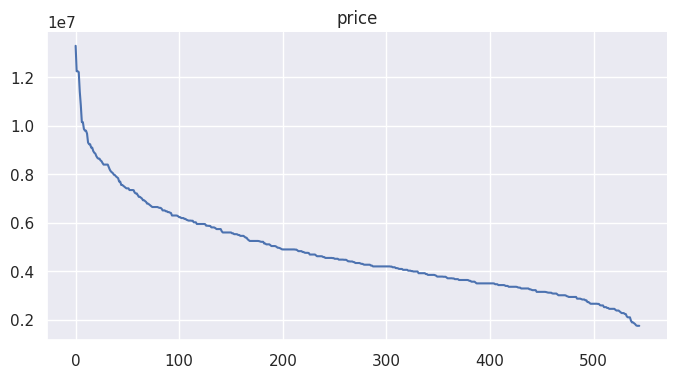

In [21]:
# @title price

from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

Some  extreme values are exist we  will more explore these values

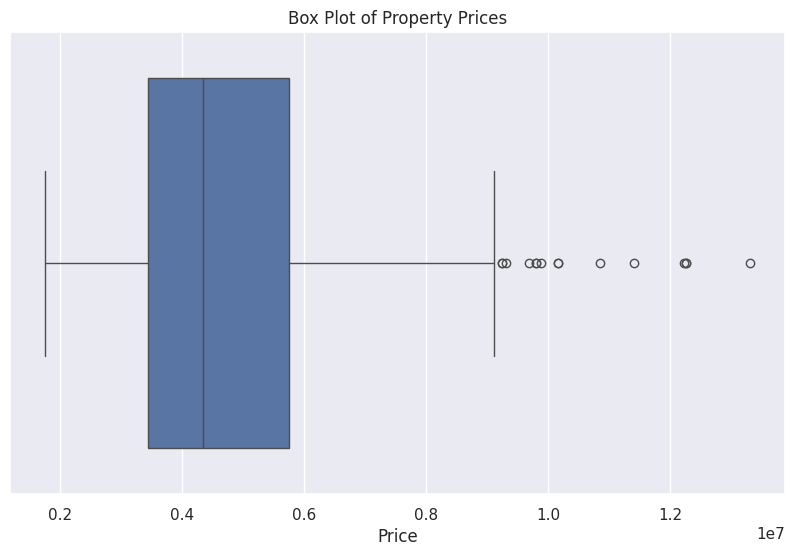

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.title('Box Plot of Property Prices')
plt.show()

Yes there are Some outlier exist

## Outlier Treatment

In [23]:
import pandas as pd

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df_norm = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]


New Data Frame name as df_norm(which is normlized)

In [24]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
17              no             yes        2       no        furnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished

In [25]:
df_norm.describe()

price          area    bedrooms   bathrooms     stories  \
count  5.300000e+02    530.000000  530.000000  530.000000  530.000000   
mean   4.600663e+06   5061.518868    2.943396    1.260377    1.788679   
std    1.596119e+06   2075.449479    0.730515    0.464359    0.861190   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3547.500000    2.000000    1.000000    1.000000   
50%    4.270000e+06   4500.000000    3.000000    1.000000    2.000000   
75%    5.600000e+06   6315.750000    3.000000    1.000000    2.000000   
max    9.100000e+06  15600.000000    6.000000    3.000000    4.000000   

          parking  
count  530.000000  
mean     0.664151  
std      0.843320  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

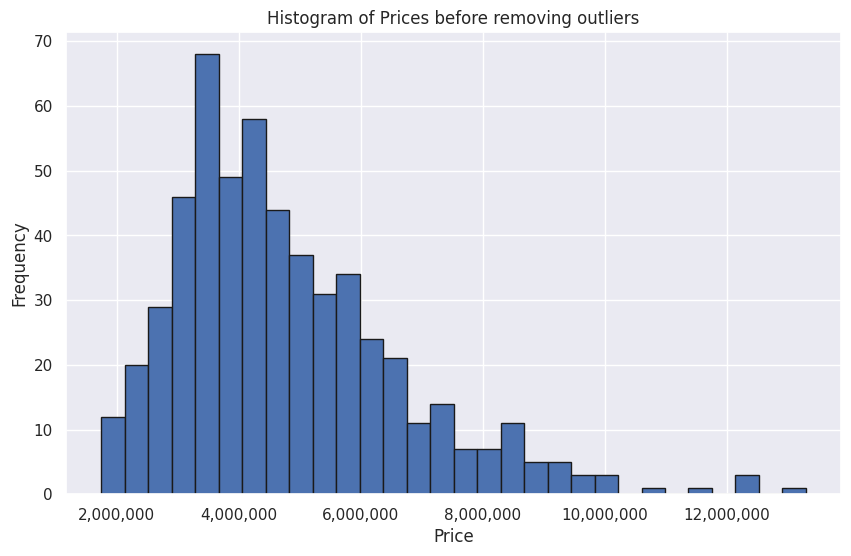

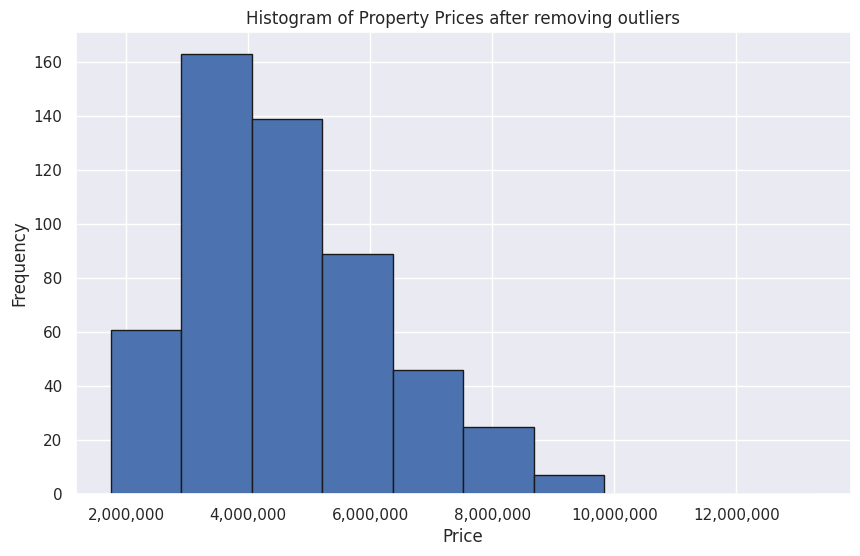

In [26]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Prices before removing outliers')


plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

min_price = 1750000
max_price = 13300000

# Calculate the range of prices
price_range = max_price - min_price


num_bins = 10

# Calculate the width of each bin
bin_width = price_range / num_bins

# Create the bin edges
bin_edges = [min_price + i * bin_width for i in range(num_bins + 1)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df_norm['price'], bins=bin_edges, edgecolor='k')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Property Prices after removing outliers')

# Format x-axis labels (optional, for better readability)
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))

plt.show()

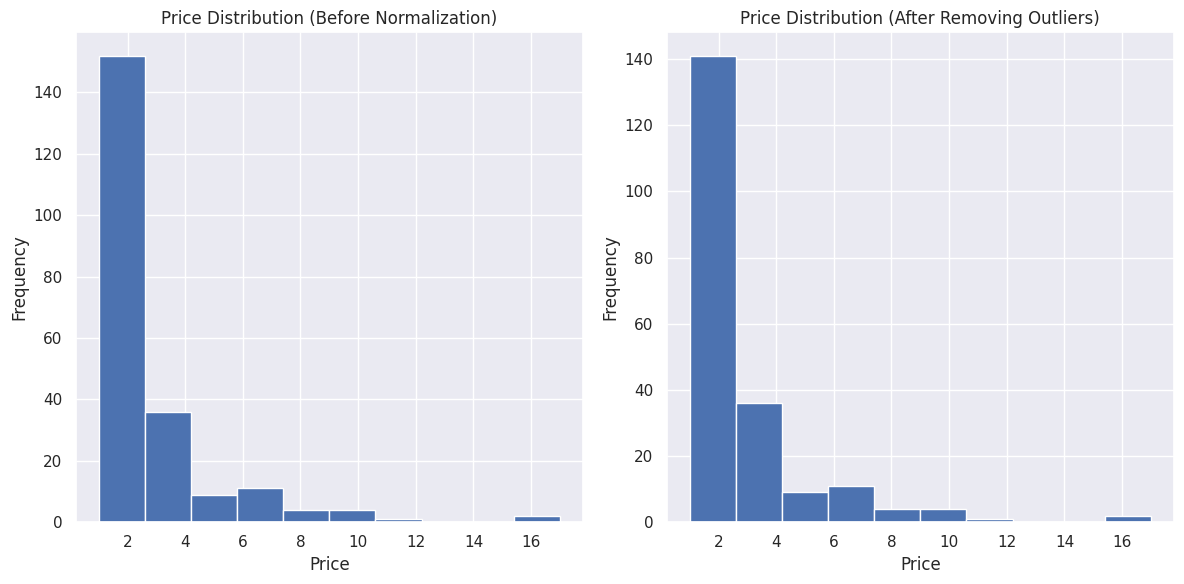

In [27]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first histogram (before normalization)
df['price'].value_counts().plot(kind='hist', ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_title('Price Distribution (Before Normalization)')

# Plot the second histogram (after removing outliers)
df_norm['price'].value_counts().plot(kind='hist', ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('Price Distribution (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-28-c3d6bed88da3>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes[0])
<ipython-input-28-c3d6bed88da3>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['price'], ax=axes[1])


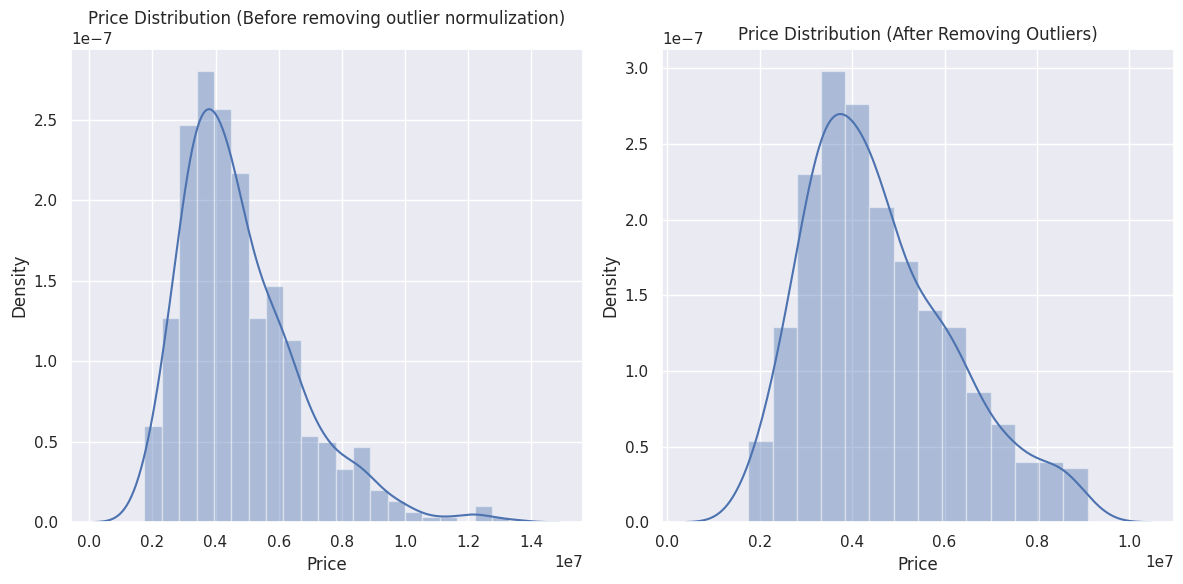

In [28]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first distribution plot (before normalization)
sns.distplot(df['price'], ax=axes[0])
axes[0].set_xlabel('Price')
axes[0].set_title('Price Distribution (Before removing outlier normulization)')

# Plot the second distribution plot (after removing outliers)
sns.distplot(df_norm['price'], ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_title('Price Distribution (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

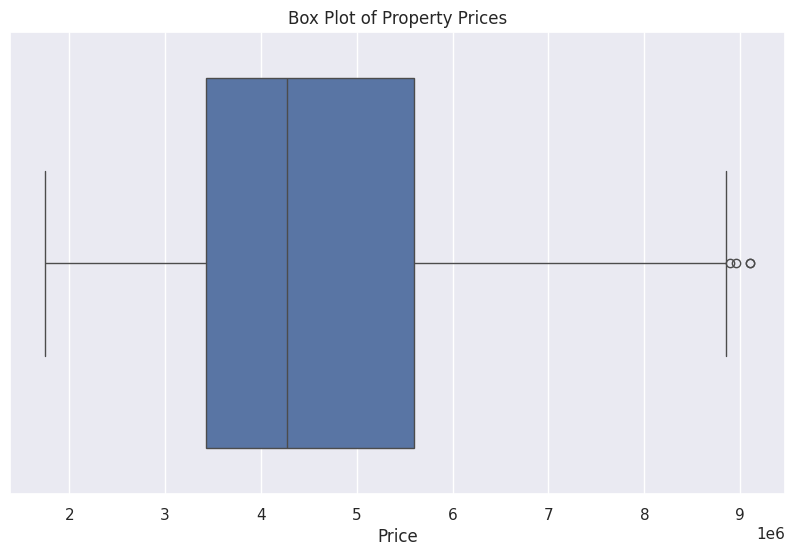

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_norm['price'])
plt.xlabel('Price')
plt.title('Box Plot of Property Prices')
plt.show()

 Outlier Hasbeen removed form the Column of Price

________________________________________

# Area

In [35]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

Text(0.5, 1.0, 'before removing outlierr)')

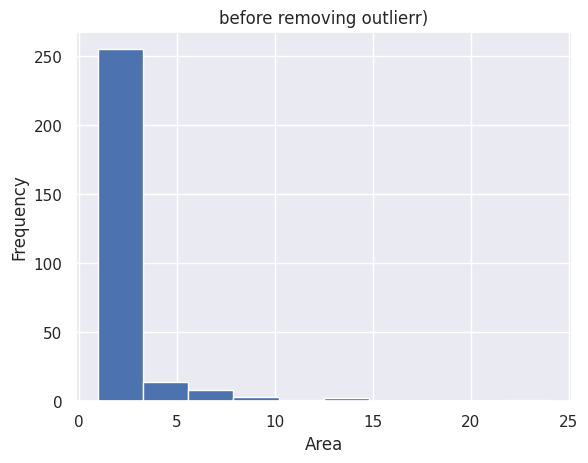

In [36]:
df['area'].value_counts().plot(kind='hist')
plt.xlabel('Area')
plt.title('before removing outlierr)')

<ipython-input-37-440eca1a3dbf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'])


Text(0.5, 1.0, 'Area (before removing outlierr)')

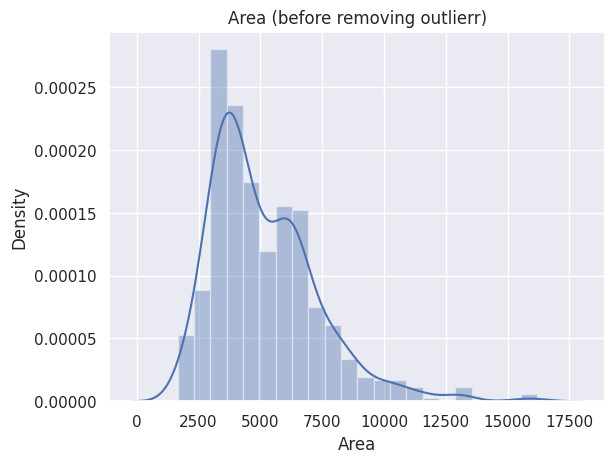

In [37]:
sns.distplot(df['area'])
plt.xlabel('Area')
plt.title('Area (before removing outlierr)')


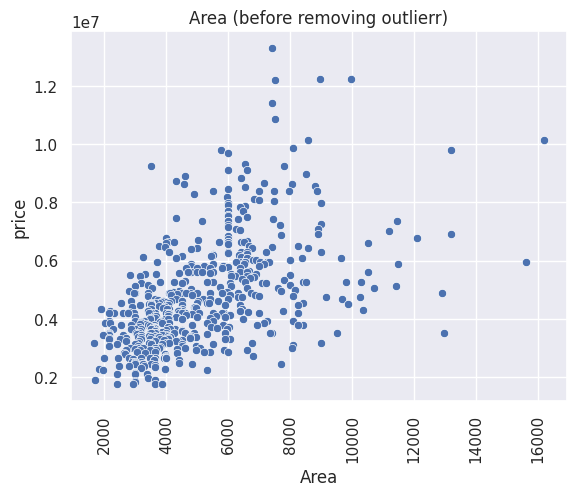

In [38]:
sns.scatterplot(x=df['area'],y=df['price'])
plt.xticks(rotation='vertical')
plt.xlabel('Area')
plt.title('Area (before removing outlierr)')
plt.show()

 we have clearly seen that Outlier exists in area colums

## Treatment of Outlier

In [44]:
import pandas as pd


# Calculate the IQR (Interquartile Range) for 'area'
Q1 = df_norm['area'].quantile(0.25)
Q3 = df_norm['area'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries for 'area'
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers from 'area'
df_norm = df_norm[(df_norm['area'] >= lower_bound) & (df_norm['area'] <= upper_bound)]



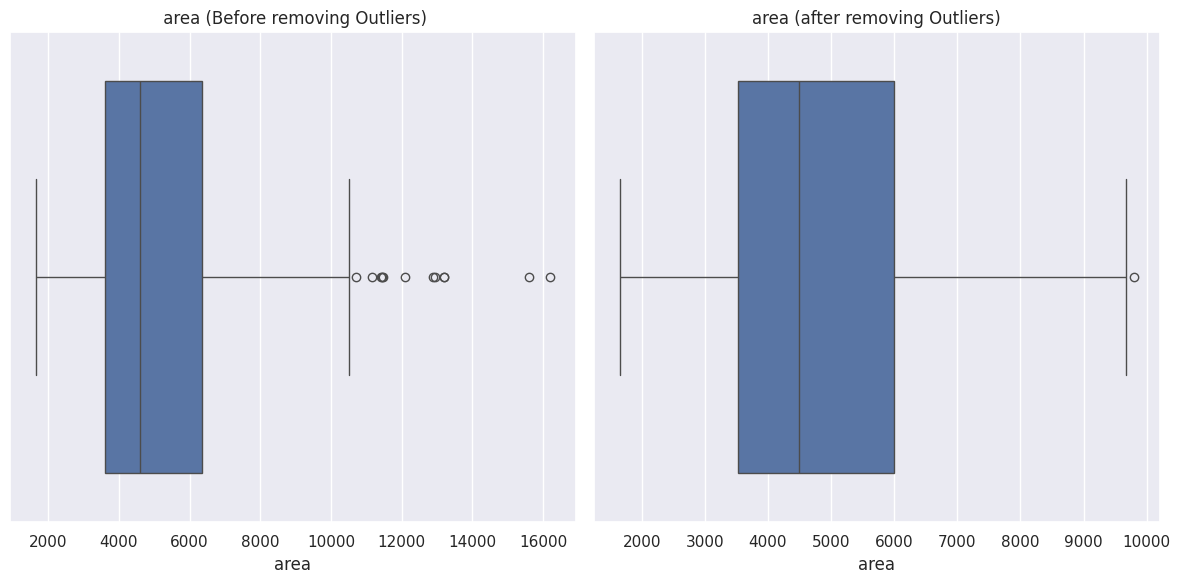

In [45]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#  area removing Outliers
sns.boxplot(x=df['area'], ax=axes[0])
axes[0].set_xlabel('area')
axes[0].set_title(' area (Before removing Outliers)')

#  area removing Outliers)
sns.boxplot(x=df_norm['area'], ax=axes[1])
axes[1].set_xlabel('area')
axes[1].set_title('area (after removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

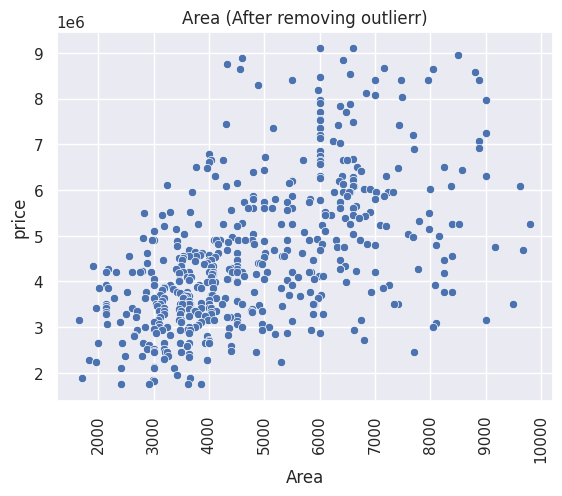

In [46]:
sns.scatterplot(x=df_norm['area'],y=df_norm['price'])
plt.xticks(rotation='vertical')
plt.xlabel('Area')
plt.title('Area (After removing outlierr)')
plt.show()


<ipython-input-47-23e7d29050c1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['area'], ax=axes[0])
<ipython-input-47-23e7d29050c1>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['area'], ax=axes[1])


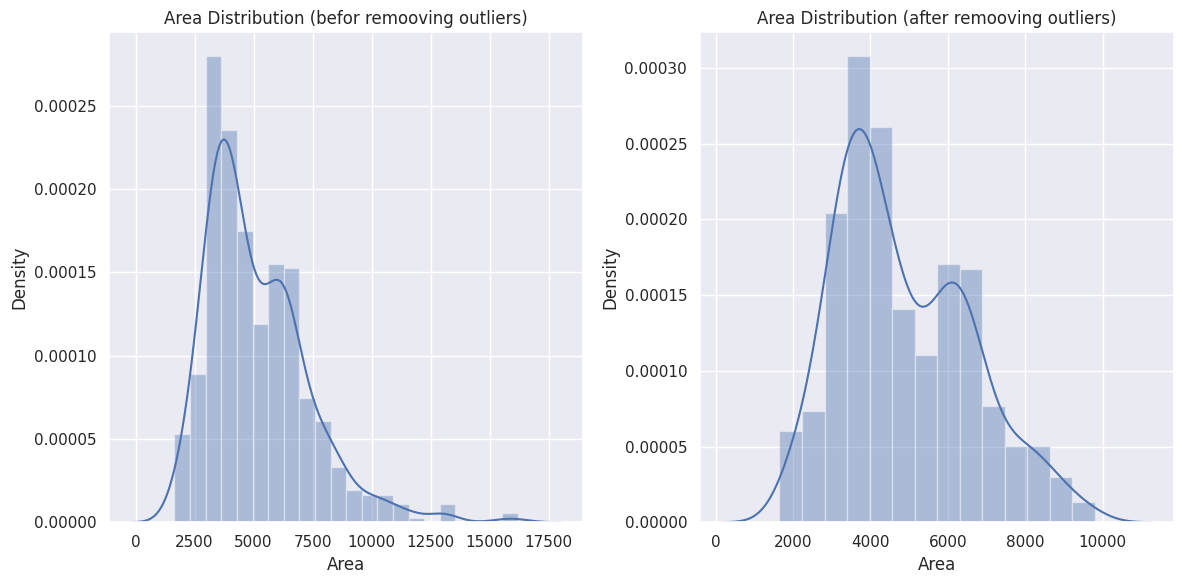

In [47]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first distribution plot befor remooving outliers
sns.distplot(df['area'], ax=axes[0])
axes[0].set_xlabel('Area')
axes[0].set_title('Area Distribution (befor remooving outliers)')

# Plot the second distribution plot after remooving outliers
sns.distplot(df_norm['area'], ax=axes[1])
axes[1].set_xlabel('Area')
axes[1].set_title('Area Distribution (after remooving outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [48]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
17              no             yes        2       no        furnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished

# Price vs Area by Number of Bedrooms

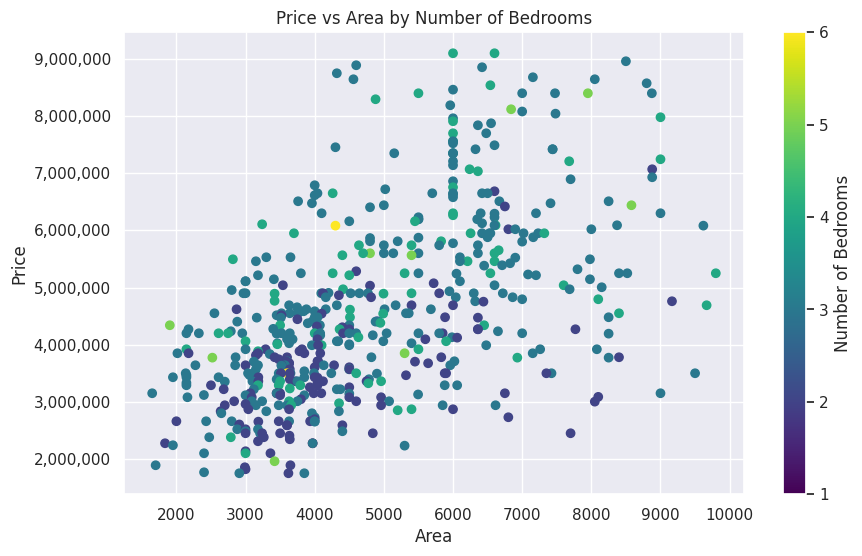

In [49]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10, 6))
plt.scatter(df_norm['area'], df_norm['price'], c=df_norm['bedrooms'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area by Number of Bedrooms')
_ = plt.colorbar(label='Number of Bedrooms')

# Format y-axis labels to display as regular numbers
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:,.0f}'.format(y)))

plt.show()

# bedrooms

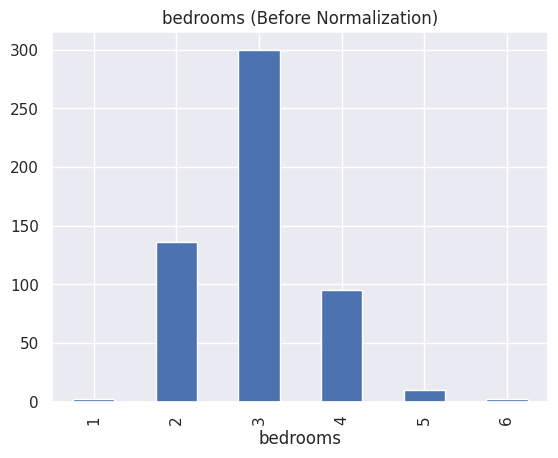

In [50]:
# Plot the first distribution plot (before normalization)
df['bedrooms'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('bedrooms')
plt.title('bedrooms (Before Normalization)')
plt.show()

<ipython-input-51-212aa04a8fe2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bedrooms'])


Text(0.5, 1.0, 'bedrooms (Before Normalization)')

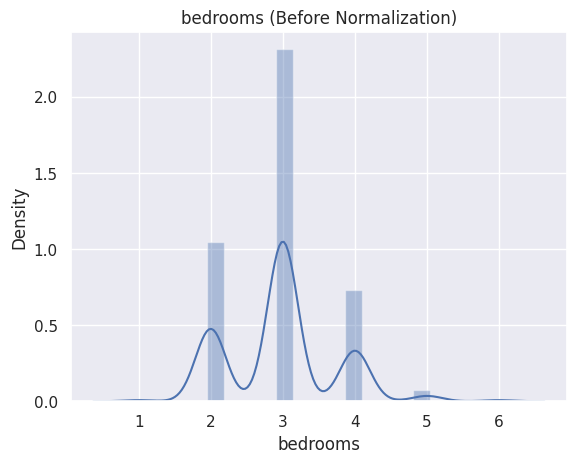

In [51]:
sns.distplot(df['bedrooms'])
plt.xlabel('bedrooms')
plt.title('bedrooms (Before Normalization)')

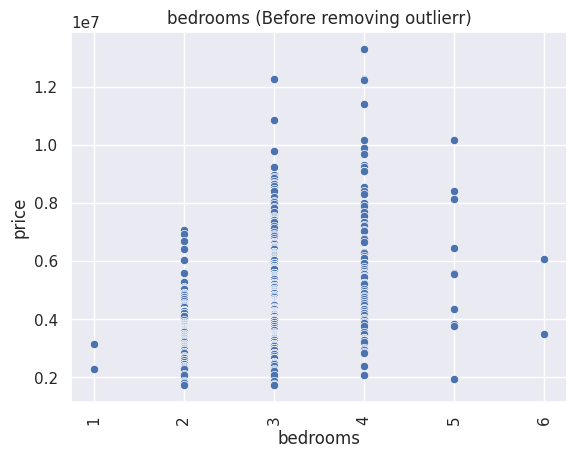

In [52]:
sns.scatterplot(x=df['bedrooms'],y=df['price'])
plt.xticks(rotation='vertical')
plt.xlabel('bedrooms')
plt.title('bedrooms (Before removing outlierr)')
plt.show()


These are not consider outliers not bigger outlier and not much effect

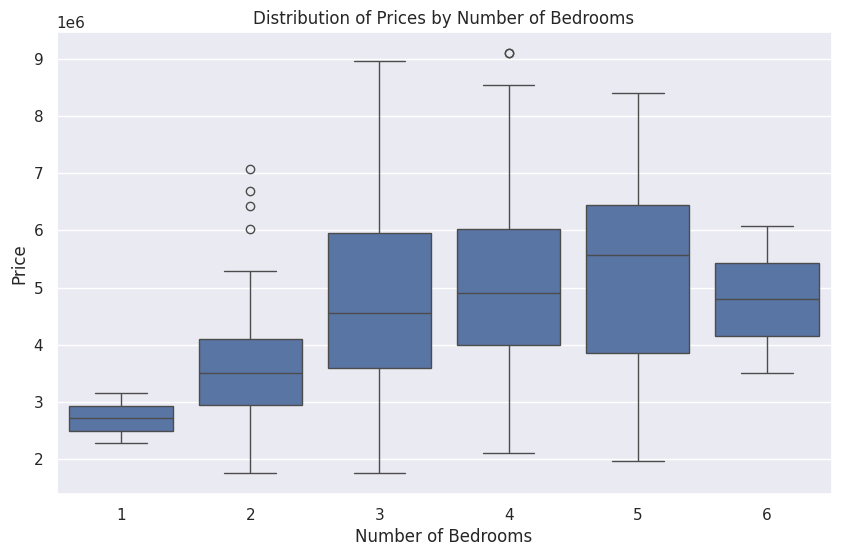

In [53]:
# @title Distribution of Prices by Number of Bedrooms

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df_norm)
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
_ = plt.title('Distribution of Prices by Number of Bedrooms')

In [54]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
17              no             yes        2       no        furnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished

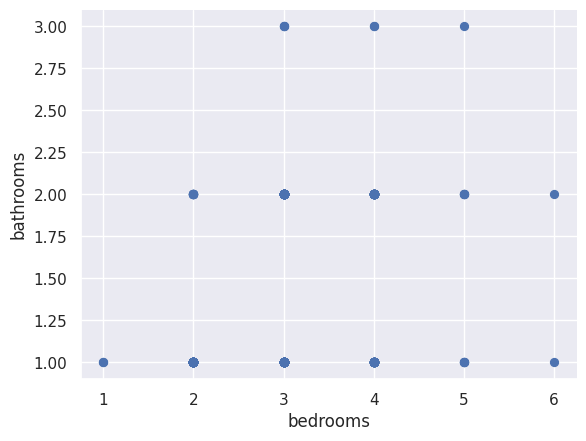

In [55]:

from matplotlib import pyplot as plt
df_norm.plot(kind='scatter', x='bedrooms', y='bathrooms', s=32, alpha=1)
plt.gca().spines[['top', 'right',]].set_visible(False)


In [56]:
import pandas as pd

Q1 = df_norm['bedrooms'].quantile(0.25)
Q3 = df_norm['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_norm = df_norm[(df_norm['bedrooms'] >= lower_bound) & (df_norm['bedrooms'] <= upper_bound)]

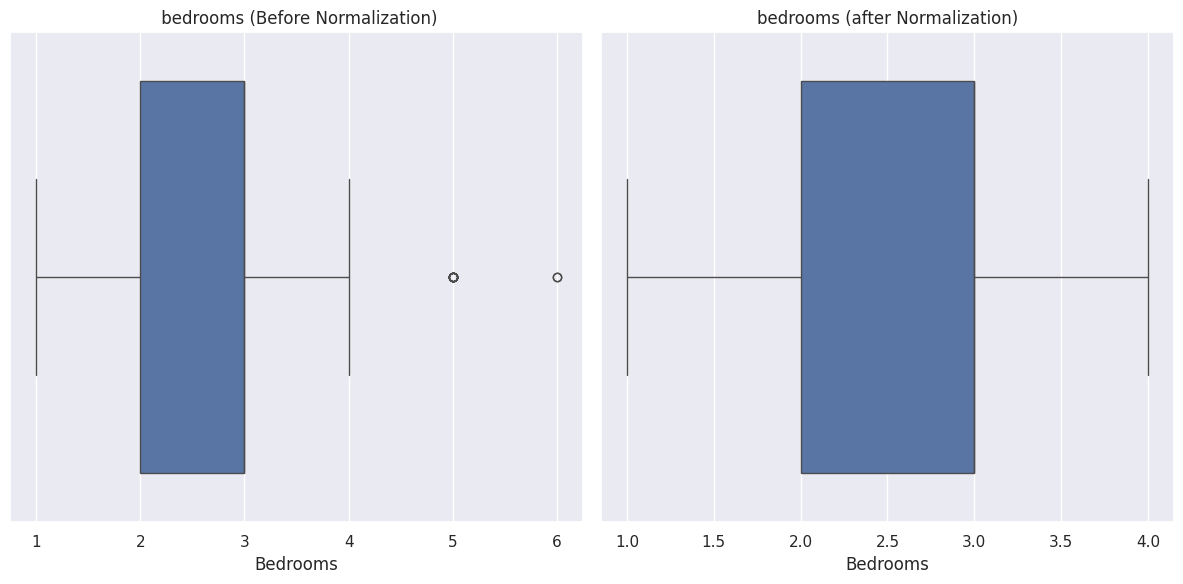

In [57]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#  bedrooms (after Normalization)
sns.boxplot(x=df['bedrooms'], ax=axes[0])
axes[0].set_xlabel('Bedrooms')
axes[0].set_title(' bedrooms (Before Normalization)')

#  bedrooms (after Normalization)
sns.boxplot(x=df_norm['bedrooms'], ax=axes[1])
axes[1].set_xlabel('Bedrooms')
axes[1].set_title('bedrooms (after Normalization)')

plt.tight_layout()
plt.show()

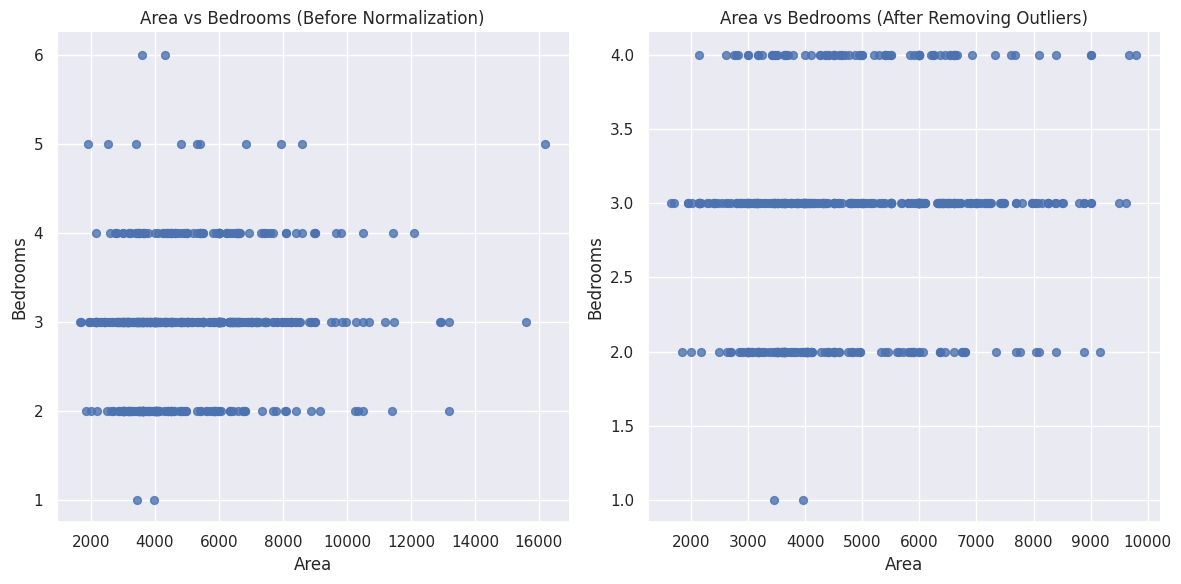

In [58]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
df.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Bedrooms')
axes[0].set_title('Area vs Bedrooms (Before Normalization)')

# Plot the second scatter plot (after removing outliers)
df_norm.plot(kind='scatter', x='area', y='bedrooms', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Bedrooms')
axes[1].set_title('Area vs Bedrooms (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

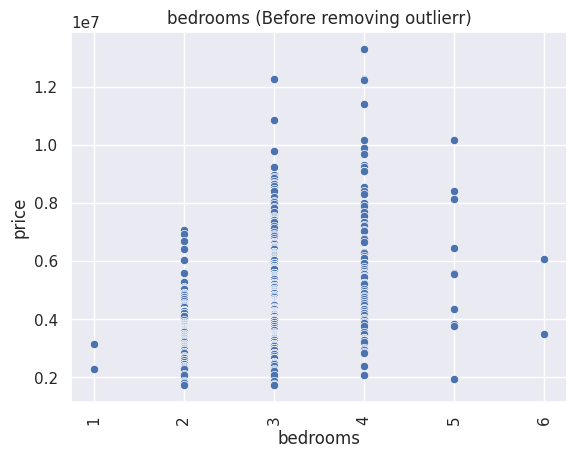

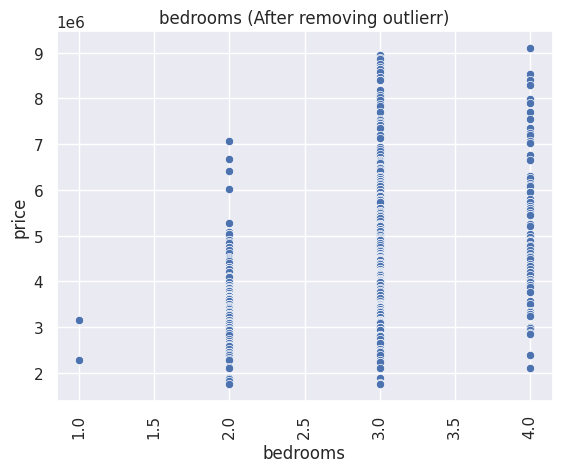

In [59]:
sns.scatterplot(x=df['bedrooms'],y=df['price'])
plt.xticks(rotation='vertical')
plt.xlabel('bedrooms')
plt.title('bedrooms (Before removing outlierr)')
plt.show()

sns.scatterplot(x=df_norm['bedrooms'],y=df_norm['price'])
plt.xticks(rotation='vertical')
plt.xlabel('bedrooms')
plt.title('bedrooms (After removing outlierr)')
plt.show()

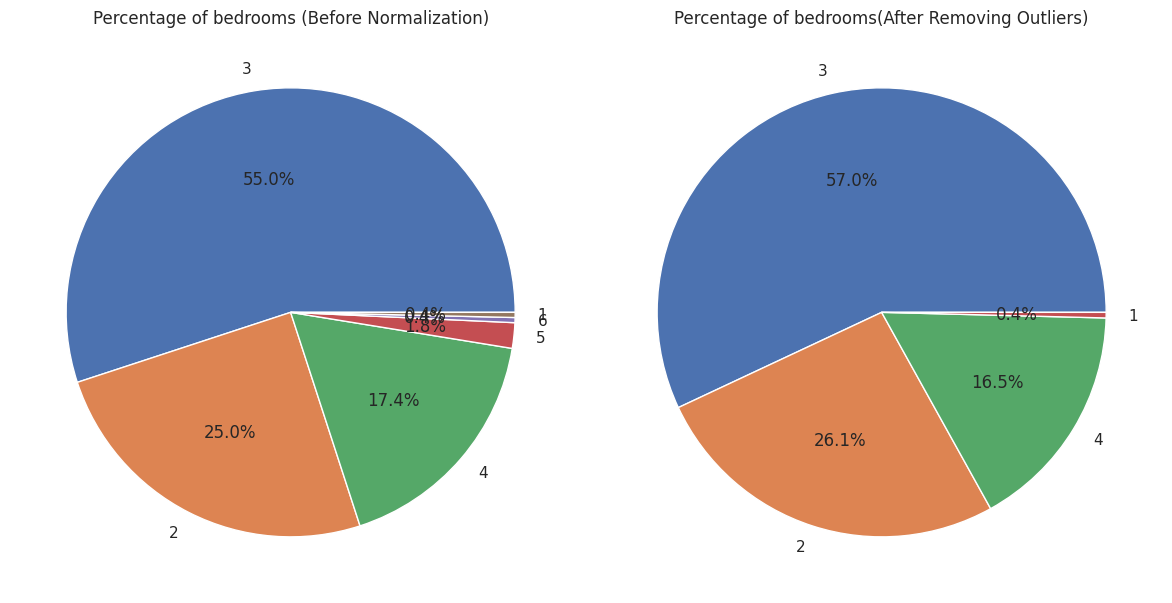

In [60]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['bedrooms'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of bedrooms (Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['bedrooms'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of bedrooms(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

__________________________________________________

# Bathrooms

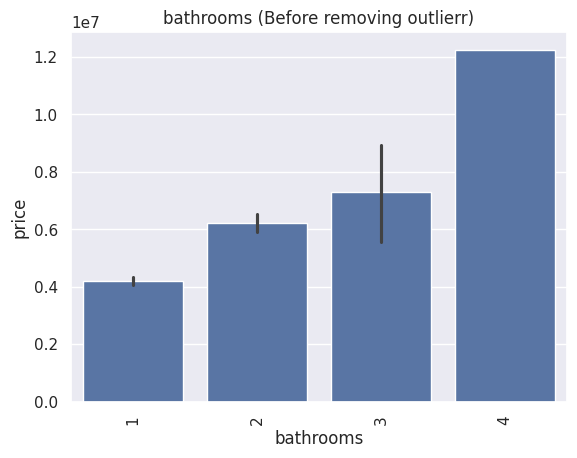

In [61]:
#Sort the DataFrame by 'bathrooms'
df_sorted = df.sort_values('bathrooms')

# Plot the barplot using the sorted DataFrame
sns.barplot(x=df_sorted['bathrooms'], y=df_sorted['price'])
plt.title('bathrooms (Before removing outlierr)')
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-62-0b44211b45b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bathrooms'])


Text(0.5, 1.0, 'bathrooms (before removing outlierr)')

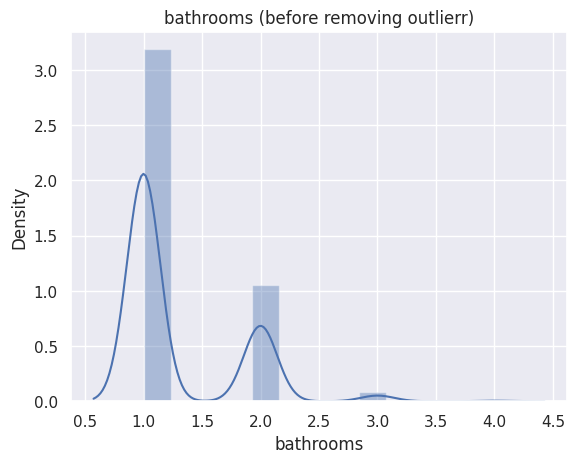

In [62]:
sns.distplot(df['bathrooms'])
plt.title('bathrooms (before removing outlierr)')

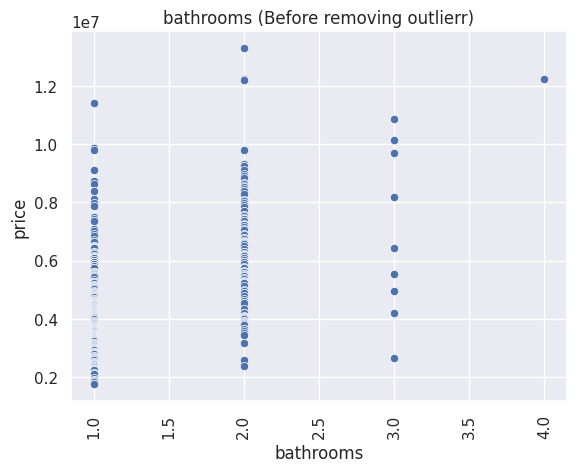

In [63]:
sns.scatterplot(x=df['bathrooms'],y=df['price'])
plt.title('bathrooms (Before removing outlierr)')
plt.xticks(rotation='vertical')
plt.show()

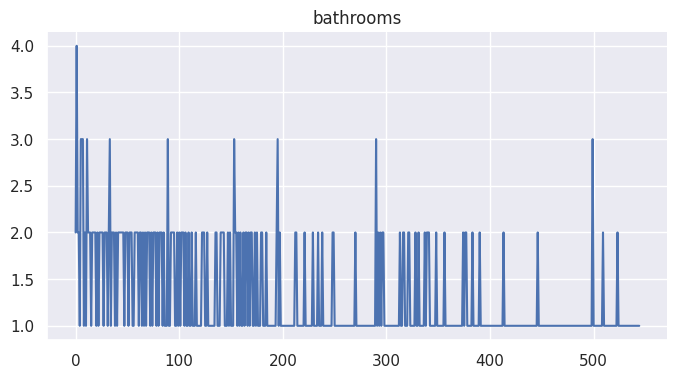

In [64]:

from matplotlib import pyplot as plt
df['bathrooms'].plot(kind='line', figsize=(8, 4), title='bathrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

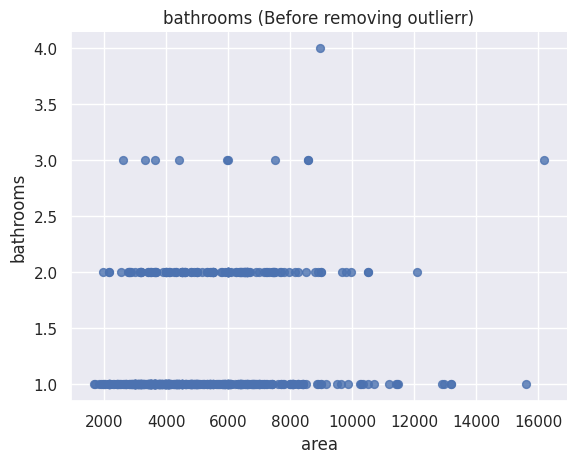

In [65]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='area', y='bathrooms', s=32, alpha=.8)
plt.title('bathrooms (Before removing outlierr)')
plt.gca().spines[['top', 'right',]].set_visible(False)

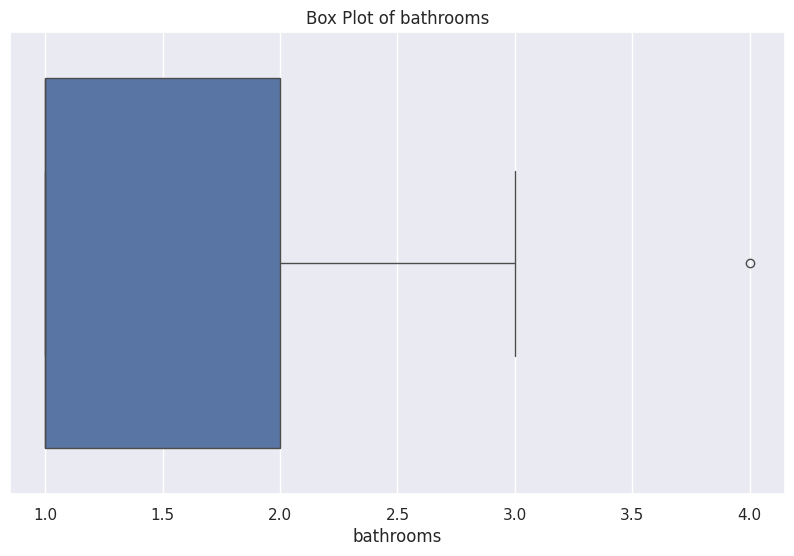

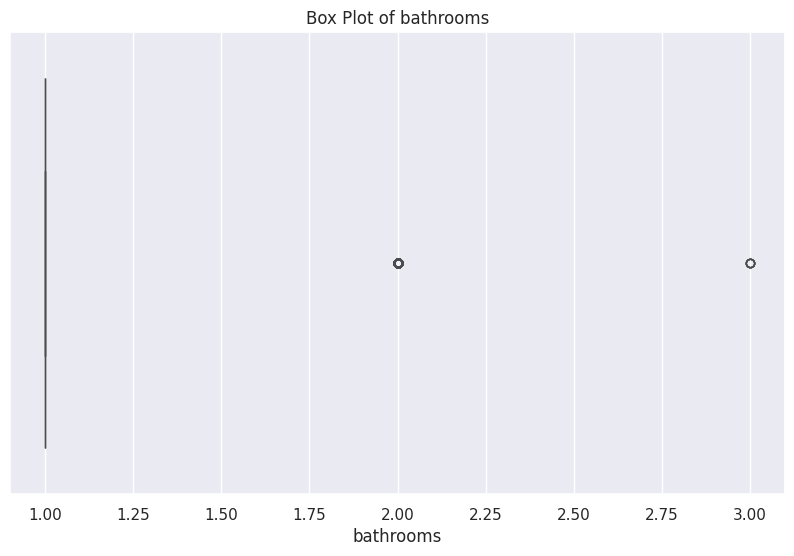

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bathrooms'])
plt.xlabel('bathrooms')
plt.title('Box Plot of bathrooms')
plt.show()
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(x=df_norm['bathrooms'])
plt.xlabel('bathrooms')
plt.title('Box Plot of bathrooms')
plt.show()


In [67]:
df_norm.head(5)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
17  8960000  8500         3          2        4      yes        no       no   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
17              no             yes        2       no        furnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished

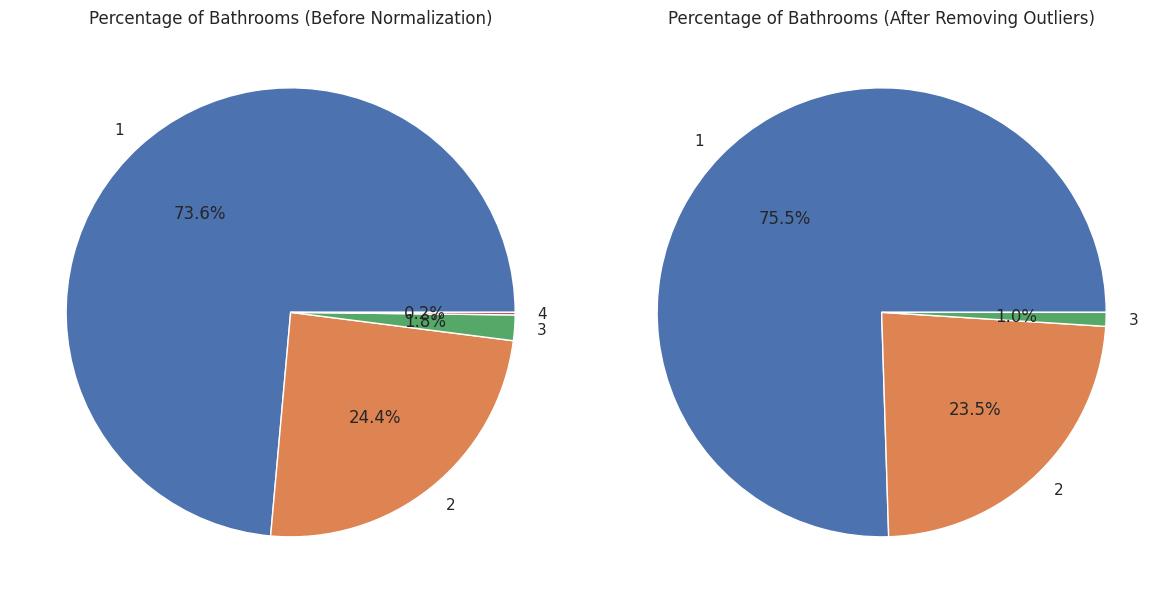

In [68]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['bathrooms'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of Bathrooms (Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['bathrooms'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of Bathrooms (After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



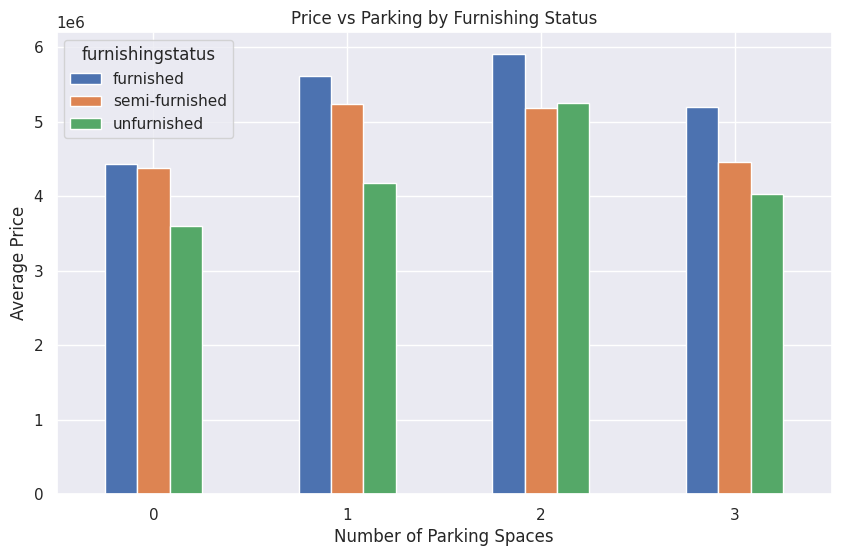

In [69]:
# @title Price vs Parking by Furnishing Status

import matplotlib.pyplot as plt

# Group the data and calculate mean prices
grouped_data = df_norm.groupby(['parking', 'furnishingstatus'])['price'].mean().unstack()

# Plot the grouped bar chart
grouped_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Average Price')
plt.title('Price vs Parking by Furnishing Status')
_ = plt.xticks(rotation=0)

_____________________________________________________________

# Stories

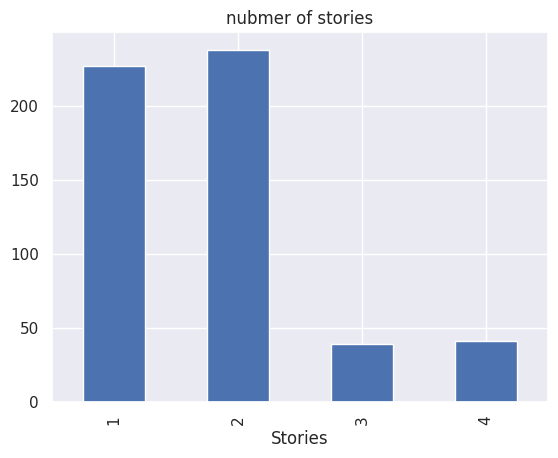

In [70]:
# Plot the first distribution plot (before normalization)
df['stories'].value_counts().sort_index().plot(kind='bar')
plt.xlabel('Stories')
plt.title('nubmer of stories')
plt.show()

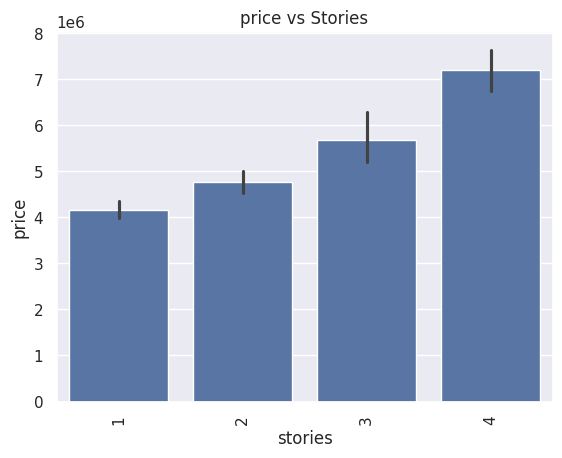

In [71]:
# Sort the DataFrame by 'bathrooms'
df_sorted = df.sort_values('stories')

# Plot the barplot using the sorted DataFrame
sns.barplot(x=df_sorted['stories'], y=df_sorted['price'])
plt.title('price vs Stories')
plt.xticks(rotation='vertical')
plt.show()

<ipython-input-72-f7d22aeed632>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['stories'])


Text(0.5, 1.0, ' number of stories')

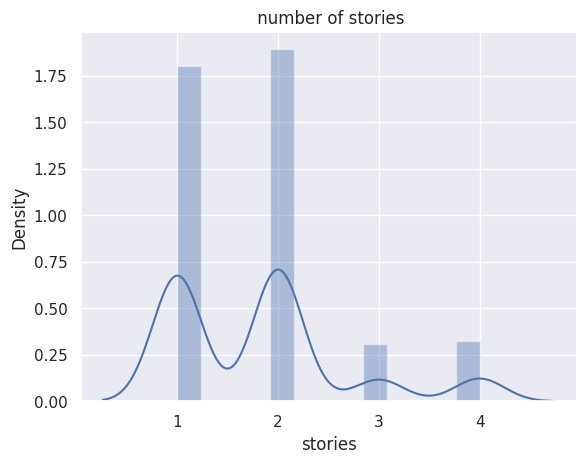

In [72]:
sns.distplot(df['stories'])
plt.title(' number of stories')

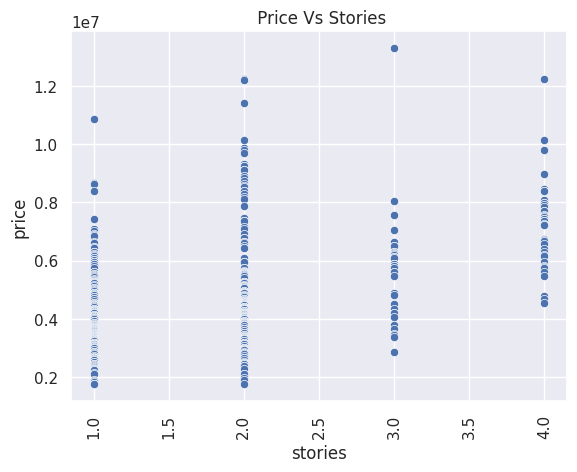

In [73]:
sns.scatterplot(x=df['stories'],y=df['price'])
plt.title(' Price Vs Stories')
plt.xticks(rotation='vertical')
plt.show()

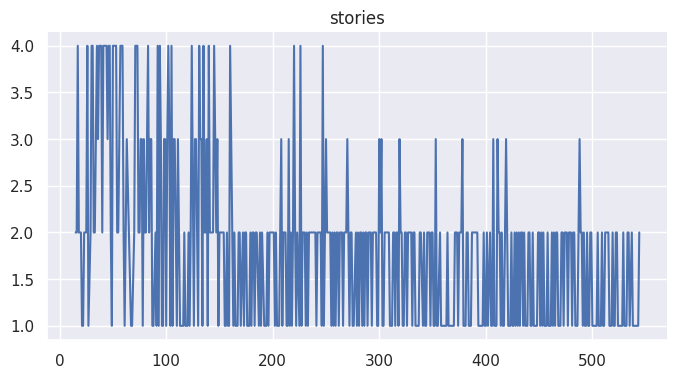

In [74]:
from matplotlib import pyplot as plt
df_norm['stories'].plot(kind='line', figsize=(8, 4), title='stories')
plt.gca().spines[['top', 'right']].set_visible(False)

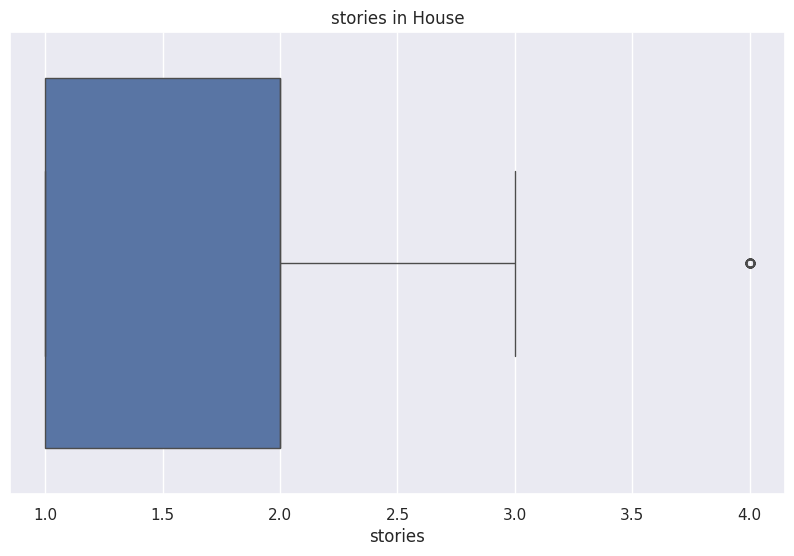

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_norm['stories'])
plt.xlabel('stories')
plt.title('stories in House')
plt.show()

There is a outlier which is 4 stories house but trend upto triple stories we will drop this value

In [76]:
import pandas as pd




Q1 = df_norm['stories'].quantile(0.25)
Q3 = df_norm['stories'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_norm = df_norm[(df_norm['stories'] >= lower_bound) & (df_norm['stories'] <= upper_bound)]

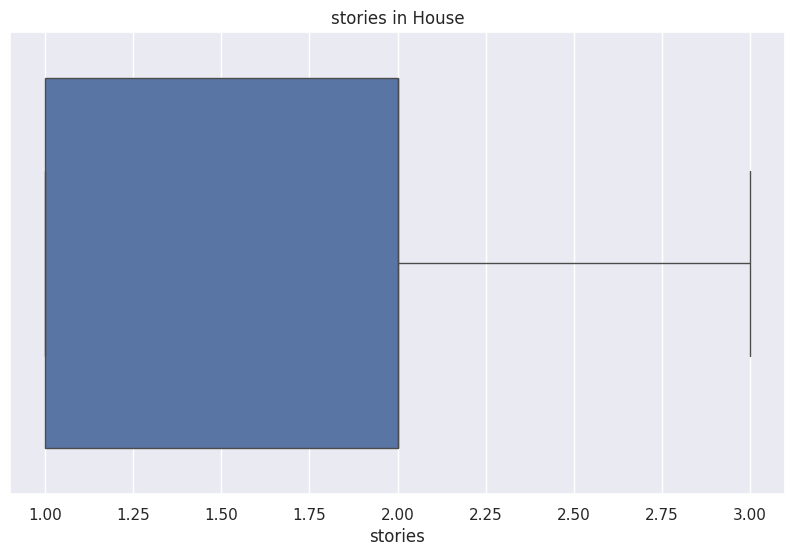

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_norm['stories'])
plt.xlabel('stories')
plt.title('stories in House')
plt.show()

Outlier has been removed

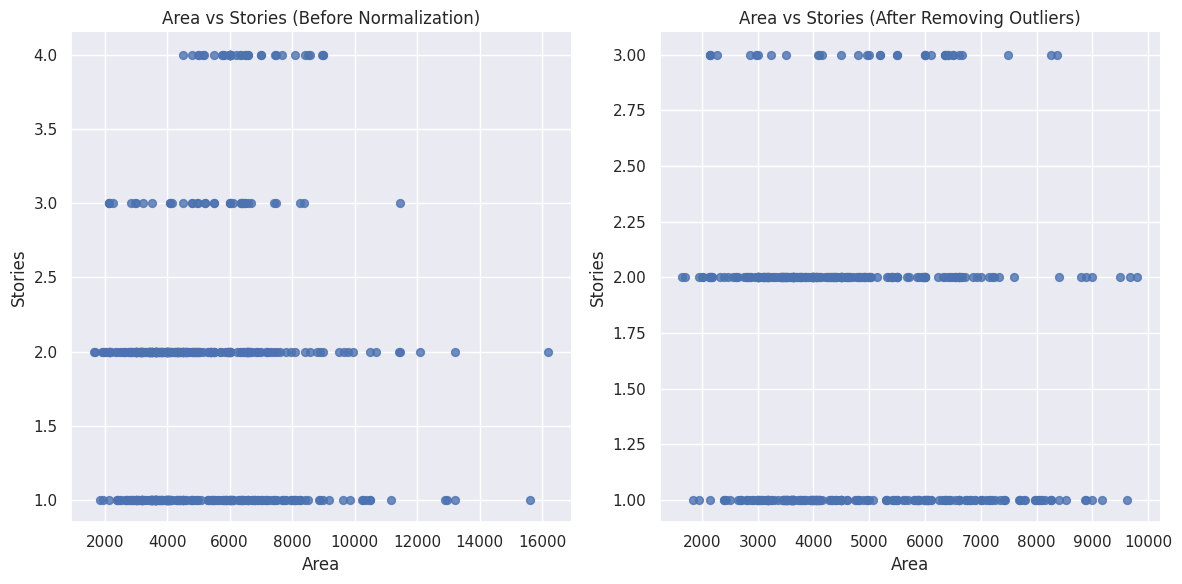

In [78]:
from matplotlib import pyplot as plt
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
df.plot(kind='scatter', x='area', y='stories', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('Stories')
axes[0].set_title('Area vs Stories (Before Normalization)')

# Plot the second scatter plot (after removing outliers)
df_norm.plot(kind='scatter', x='area', y='stories', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('Stories')
axes[1].set_title('Area vs Stories (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Text(0.5, 1.0, ' number of stories befor removing outlierr ')

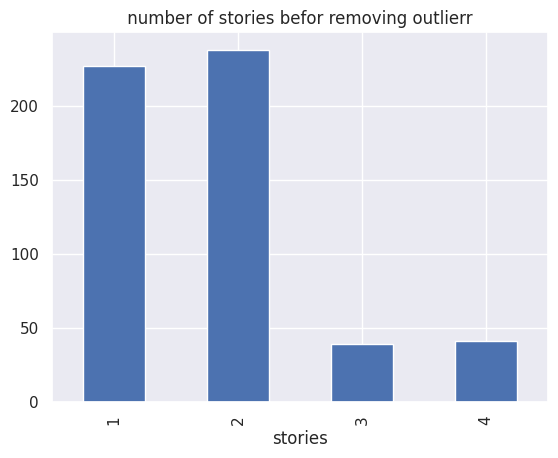

In [79]:
df['stories'].value_counts().sort_index().plot(kind='bar')
plt.title(' number of stories befor removing outlierr ')



Text(0.5, 1.0, 'number of stories after removing outlierr ')

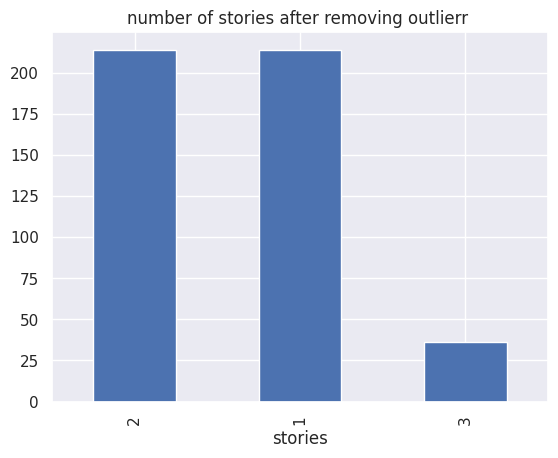

In [80]:
df_norm['stories'].value_counts().plot(kind='bar')
plt.title('number of stories after removing outlierr ')

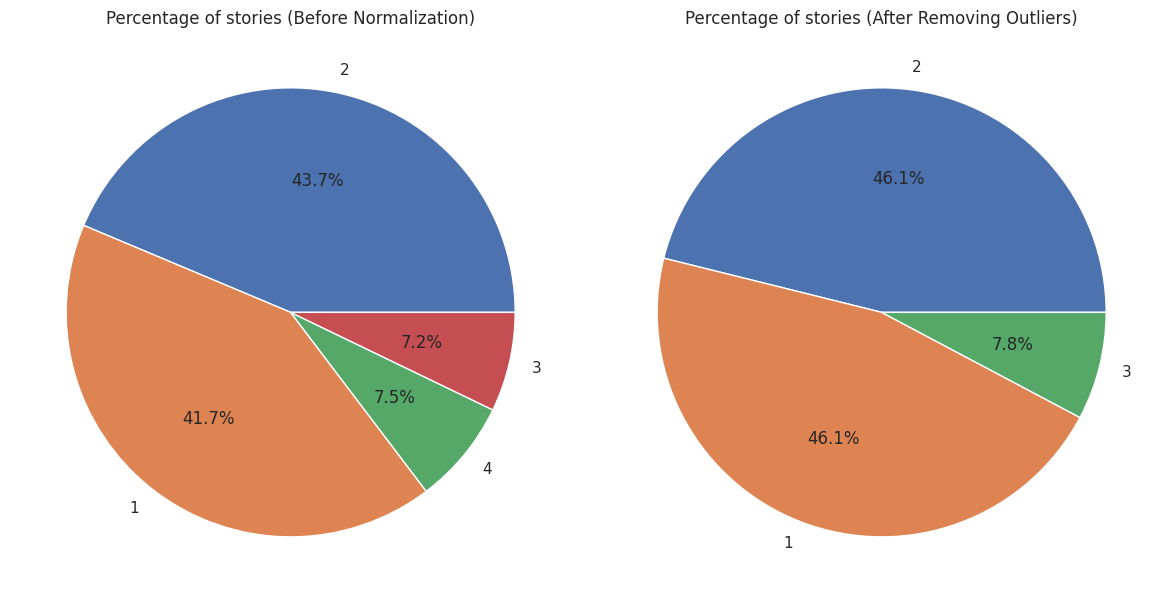

In [81]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['stories'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of stories (Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['stories'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of stories (After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [82]:
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

______________________________________________________________

# Main_Road

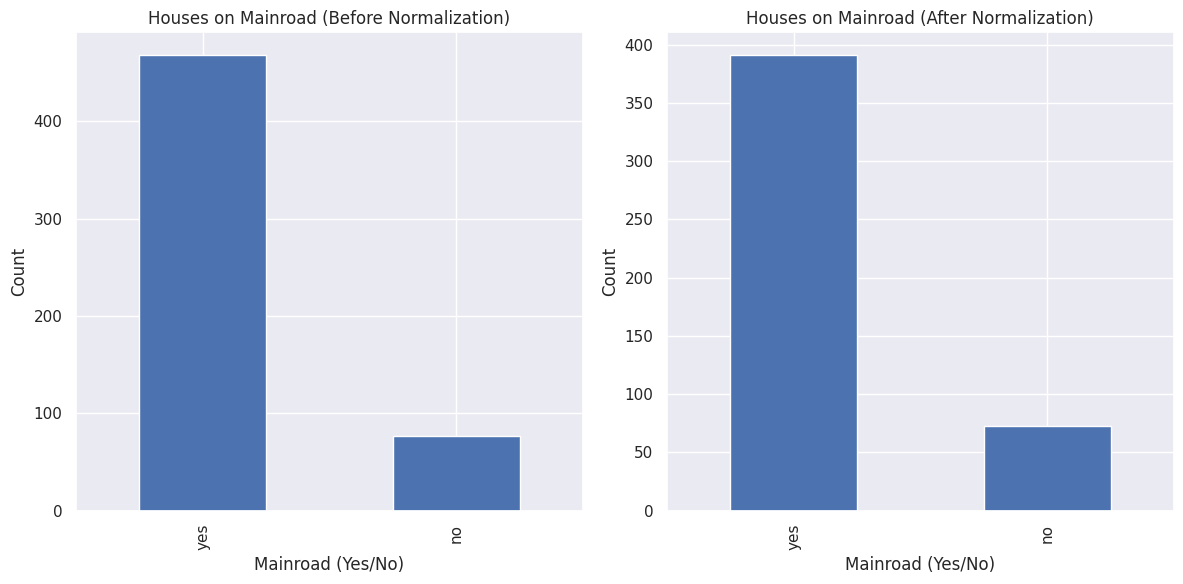

In [83]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['mainroad'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Houses on Mainroad (Before Normalization)')
axes[0].set_xlabel('Mainroad (Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['mainroad'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Houses on Mainroad (After Normalization)')
axes[1].set_xlabel('Mainroad (Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

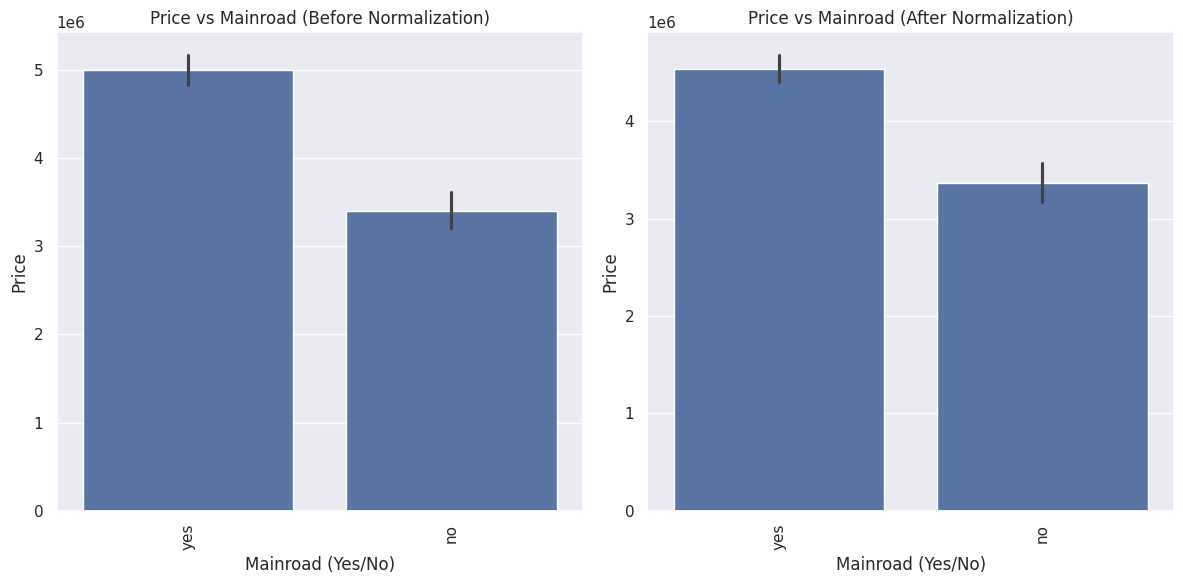

In [84]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first barplot (before normalization)
sns.barplot(x=df['mainroad'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs Mainroad (Before Normalization)')
axes[0].set_xlabel('Mainroad (Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second barplot (after removing outliers)
sns.barplot(x=df_norm['mainroad'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs Mainroad (After Normalization)')
axes[1].set_xlabel('Mainroad (Yes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

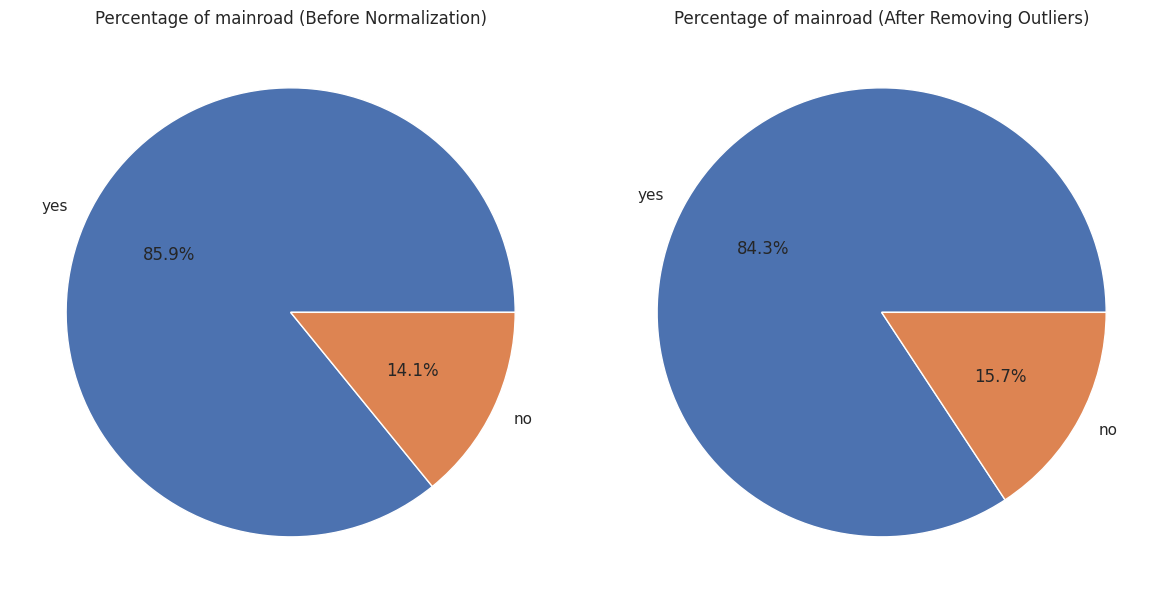

In [85]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['mainroad'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of mainroad (Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['mainroad'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of mainroad (After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

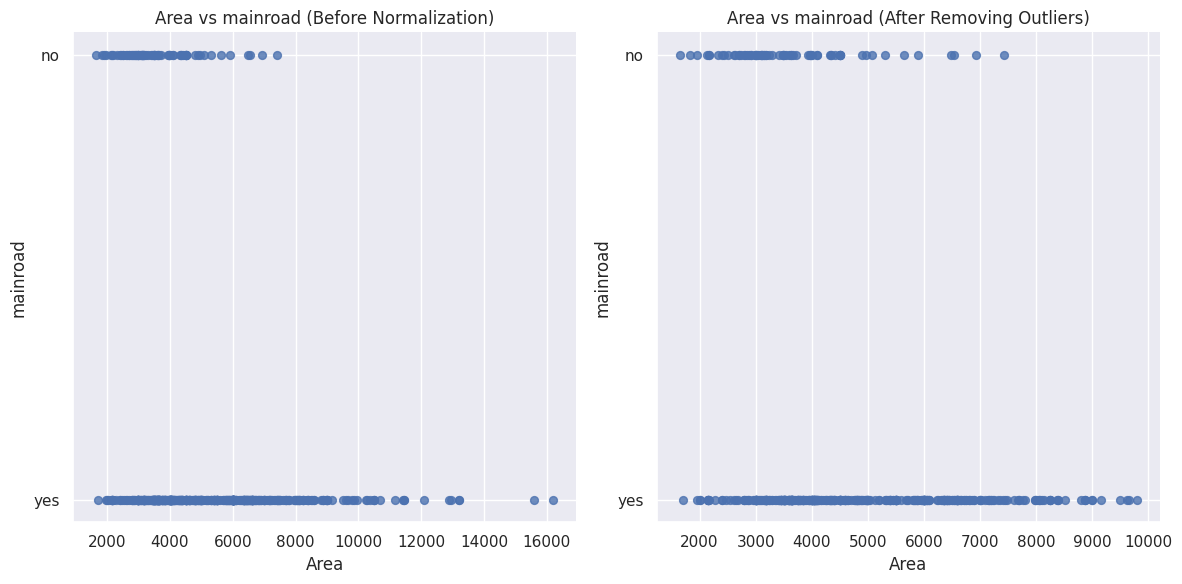

In [86]:
from matplotlib import pyplot as plt
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
df.plot(kind='scatter', x='area', y='mainroad', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('mainroad')
axes[0].set_title('Area vs mainroad (Before Normalization)')

# Plot the second scatter plot (after removing outliers)
df_norm.plot(kind='scatter', x='area', y='mainroad', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('mainroad')
axes[1].set_title('Area vs mainroad (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

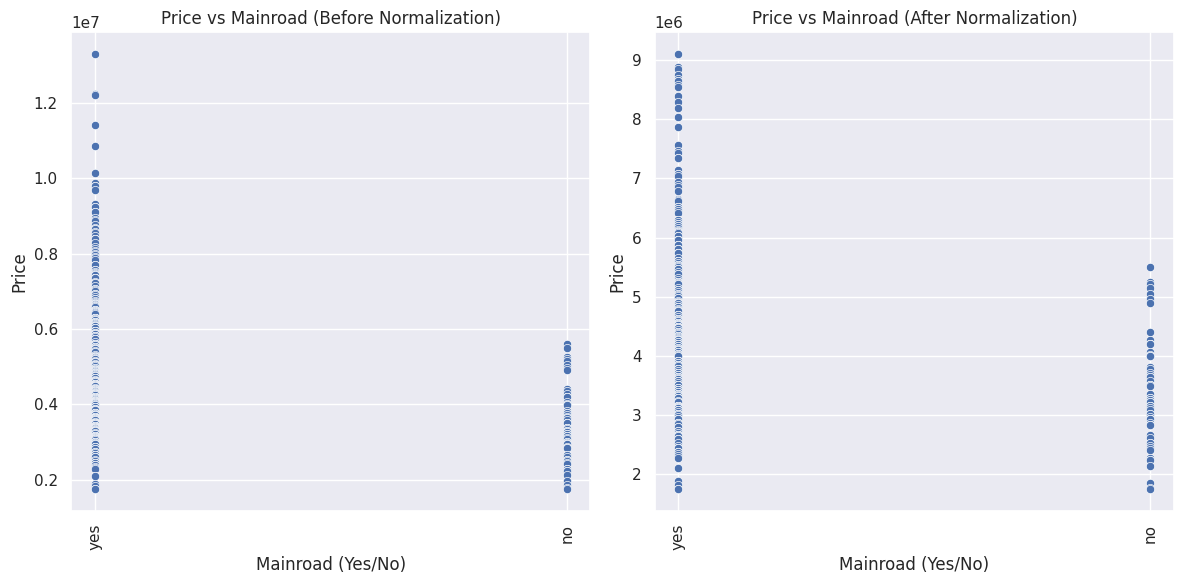

In [87]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatterplot (before normalization)
sns.scatterplot(x=df['mainroad'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs Mainroad (Before Normalization)')
axes[0].set_xlabel('Mainroad (Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second scatterplot (after removing outliers)
sns.scatterplot(x=df_norm['mainroad'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs Mainroad (After Normalization)')
axes[1].set_xlabel('Mainroad (Yes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [88]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

<ipython-input-89-da2399c07ec6>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_norm, x='price', y='mainroad', inner='stick', palette='Dark2')


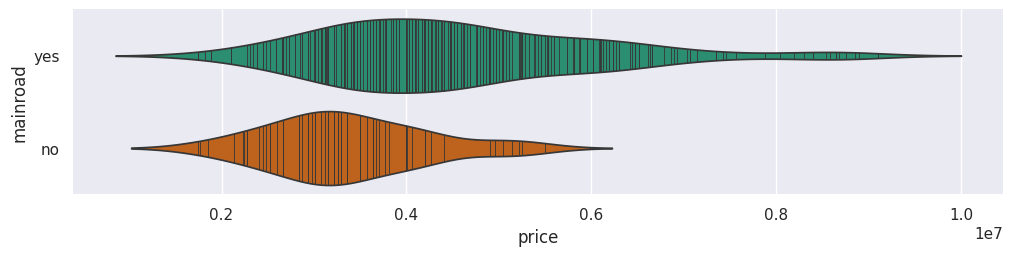

In [89]:
# @title mainroad vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['mainroad'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='price', y='mainroad', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

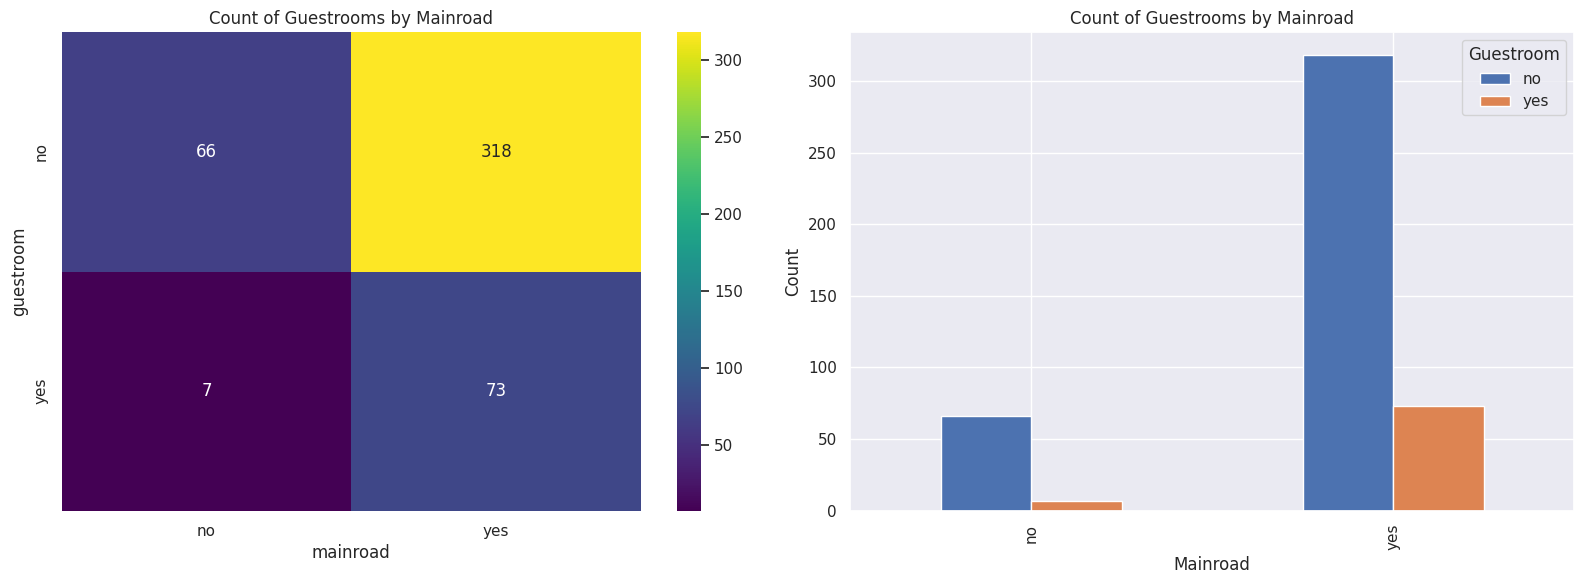

In [90]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['guestroom'].value_counts()
    for x_label, grp in df_norm.groupby('mainroad')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d', ax=axes[0])
axes[0].set_xlabel('mainroad')
axes[0].set_ylabel('guestroom')
axes[0].set_title('Count of Guestrooms by Mainroad')

# Plot the bar charts
df_norm.groupby(['mainroad', 'guestroom'])['guestroom'].count().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Mainroad')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Guestrooms by Mainroad')
axes[1].legend(title='Guestroom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

________________________________________________________________

# Guest_room

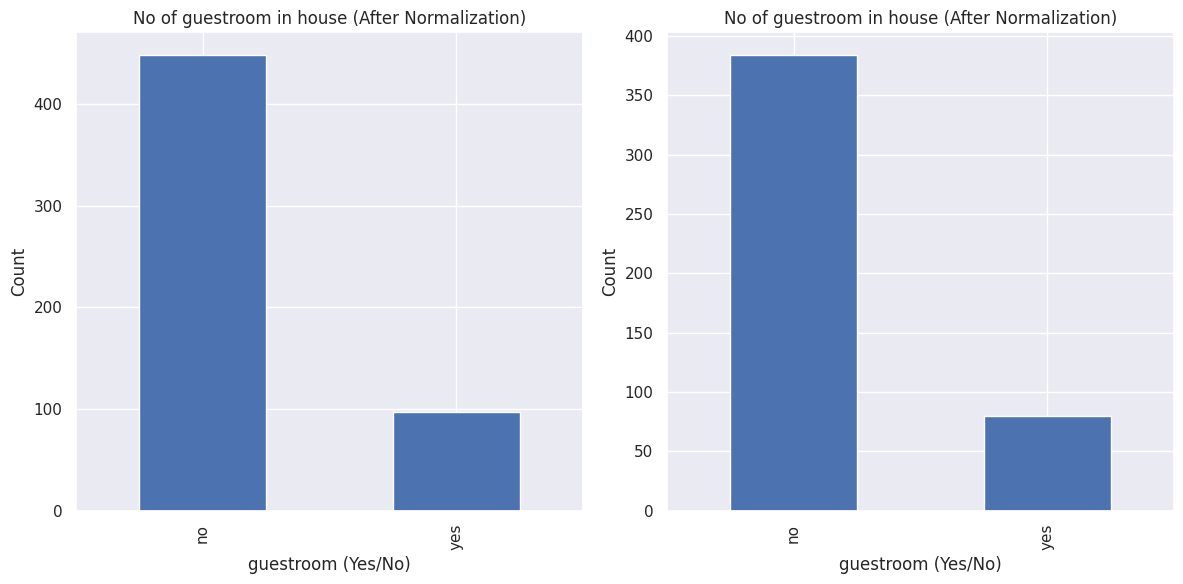

In [91]:
 #Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['guestroom'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('No of guestroom in house (After Normalization)')
axes[0].set_xlabel('guestroom (Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['guestroom'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('No of guestroom in house (After Normalization)')
axes[1].set_xlabel('guestroom (Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


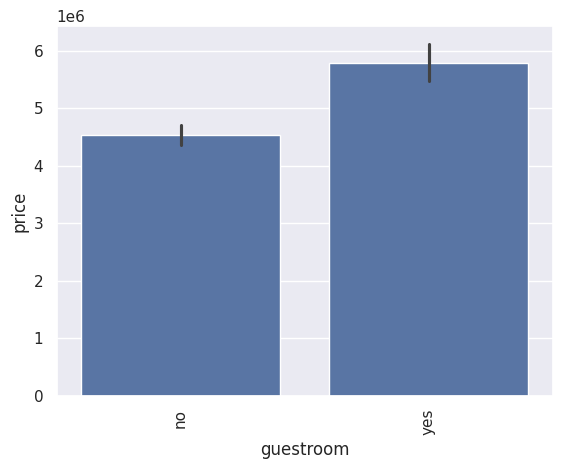

In [92]:
sns.barplot(x=df['guestroom'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

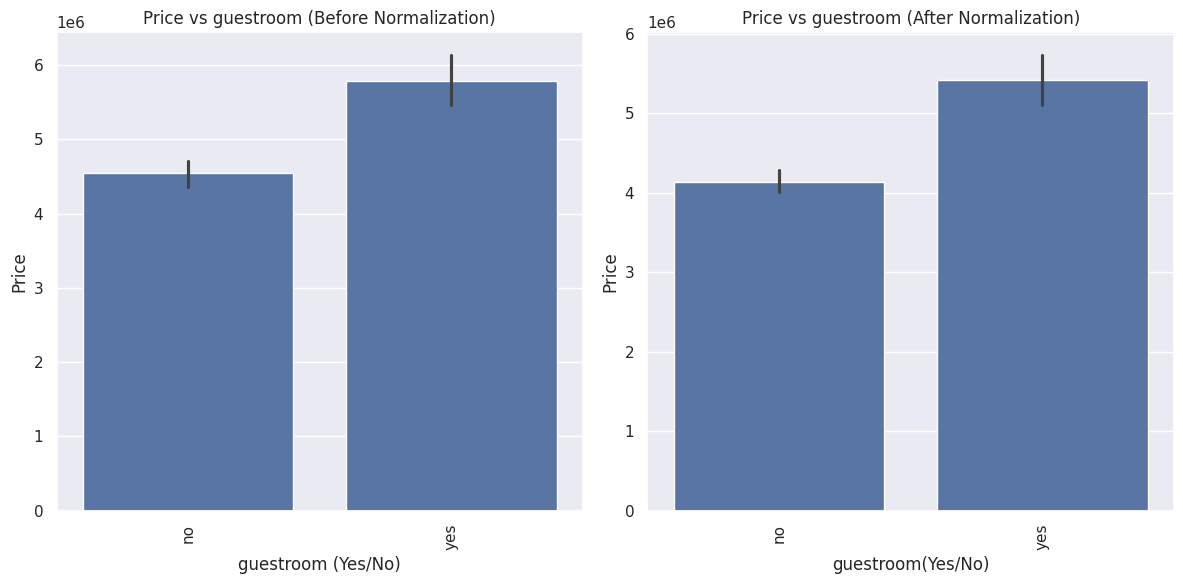

In [93]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first barplot (before normalization)
sns.barplot(x=df['guestroom'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs guestroom (Before Normalization)')
axes[0].set_xlabel('guestroom (Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second barplot (after removing outliers)
sns.barplot(x=df_norm['guestroom'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs guestroom (After Normalization)')
axes[1].set_xlabel('guestroom(Yes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

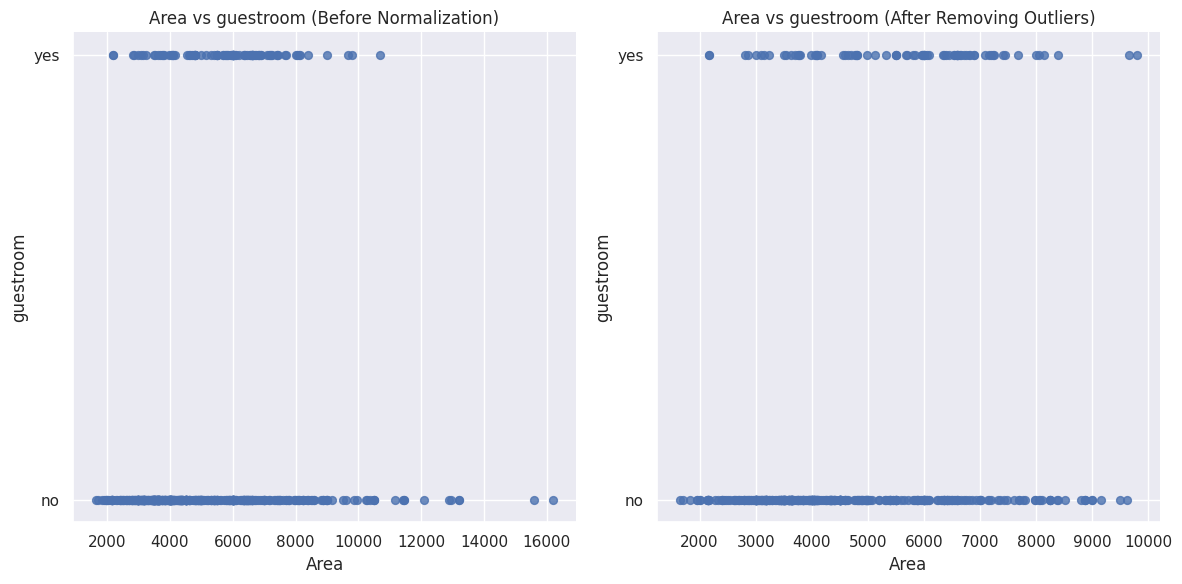

In [94]:
from matplotlib import pyplot as plt
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
df.plot(kind='scatter', x='area', y='guestroom', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('guestroom')
axes[0].set_title('Area vs guestroom (Before Normalization)')

# Plot the second scatter plot (after removing outliers)
df_norm.plot(kind='scatter', x='area', y='guestroom', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('guestroom')
axes[1].set_title('Area vs guestroom (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

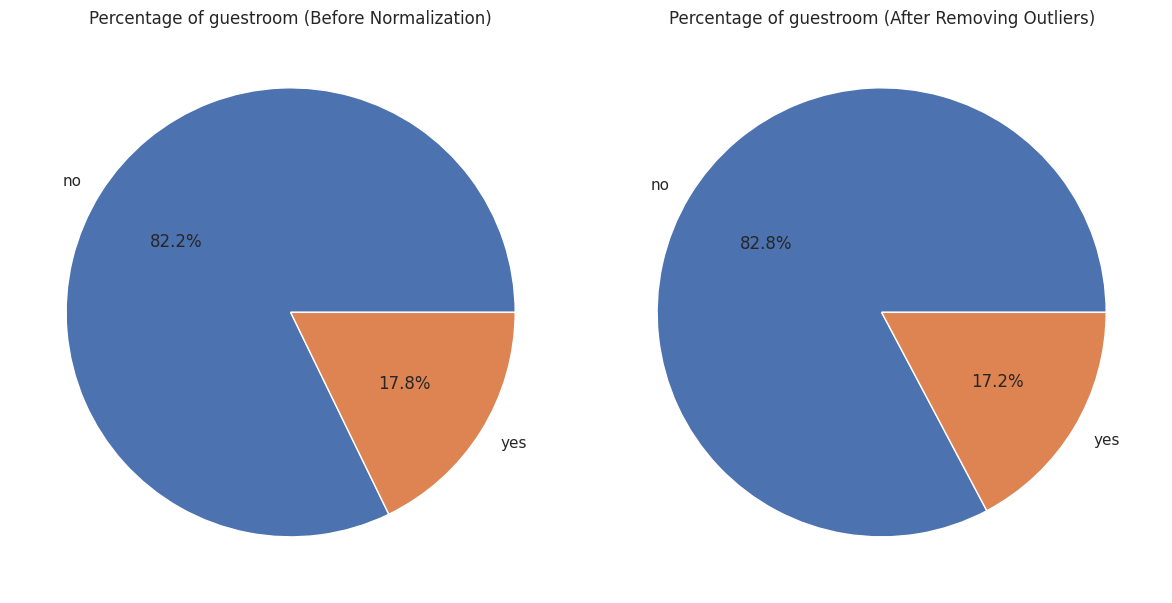

In [95]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['guestroom'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of guestroom (Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['guestroom'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of guestroom (After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [96]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

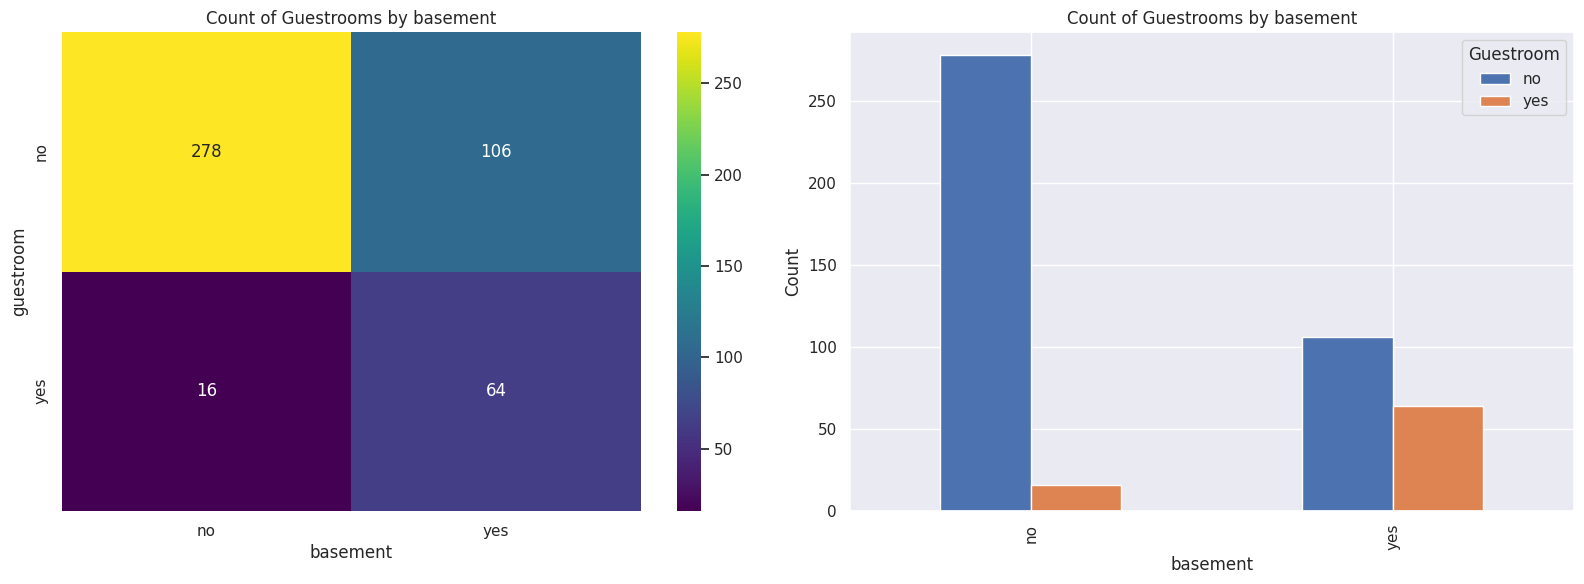

In [97]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot the heatmap
df_2dhist = pd.DataFrame({
    x_label: grp['guestroom'].value_counts()
    for x_label, grp in df_norm.groupby('basement')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d', ax=axes[0])
axes[0].set_xlabel('basement')
axes[0].set_ylabel('guestroom')
axes[0].set_title('Count of Guestrooms by basement')

# Plot the bar charts
df_norm.groupby(['basement', 'guestroom'])['guestroom'].count().unstack().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('basement')
axes[1].set_ylabel('Count')
axes[1].set_title('Count of Guestrooms by basement')
axes[1].legend(title='Guestroom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

________________________________________________________________

# Basement

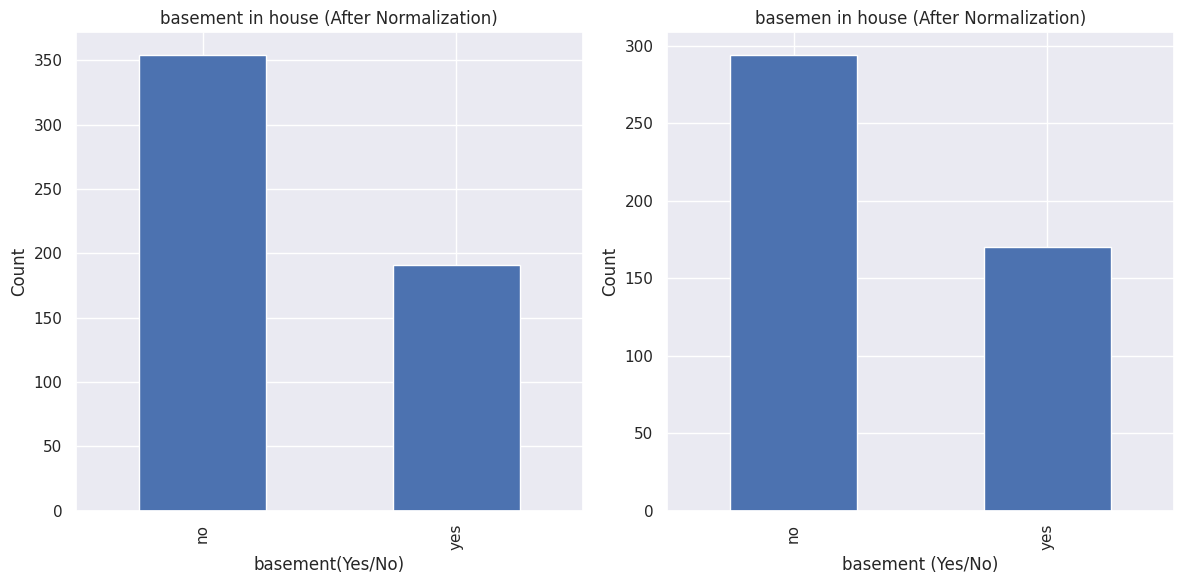

In [98]:
#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['basement'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('basement in house (After Normalization)')
axes[0].set_xlabel('basement(Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['basement'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('basemen in house (After Normalization)')
axes[1].set_xlabel('basement (Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


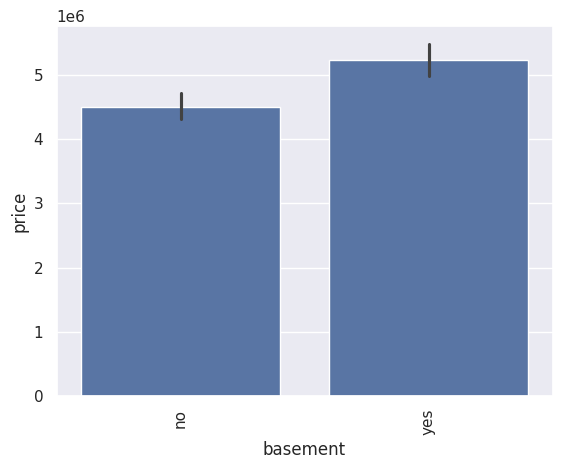

In [99]:
sns.barplot(x=df['basement'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

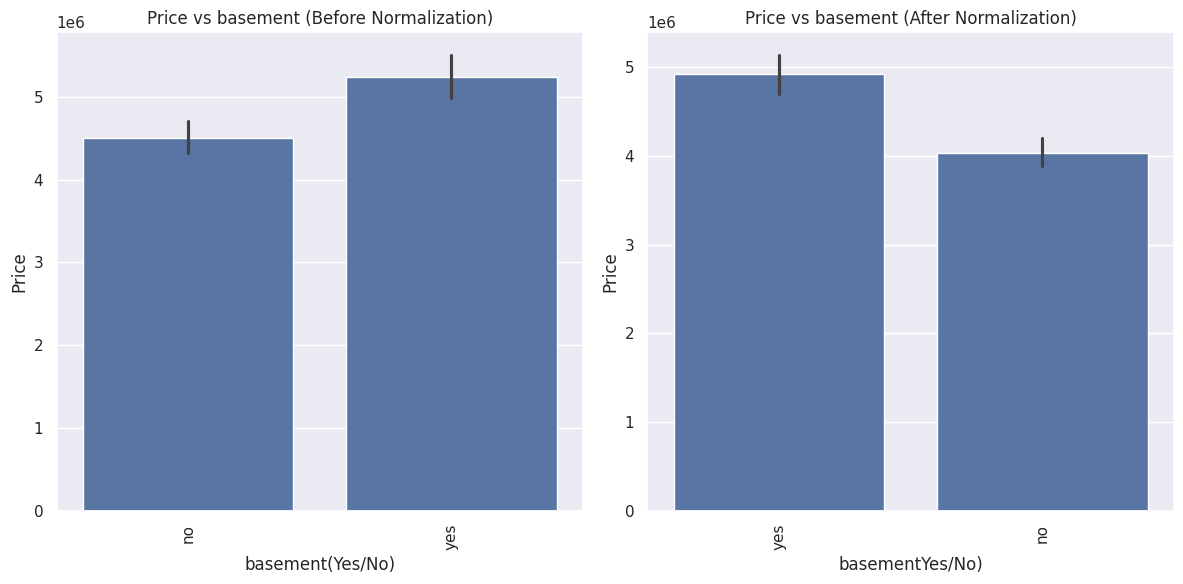

In [100]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first barplot (before normalization)
sns.barplot(x=df['basement'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs basement (Before Normalization)')
axes[0].set_xlabel('basement(Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second barplot (after removing outliers)
sns.barplot(x=df_norm['basement'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs basement (After Normalization)')
axes[1].set_xlabel('basementYes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

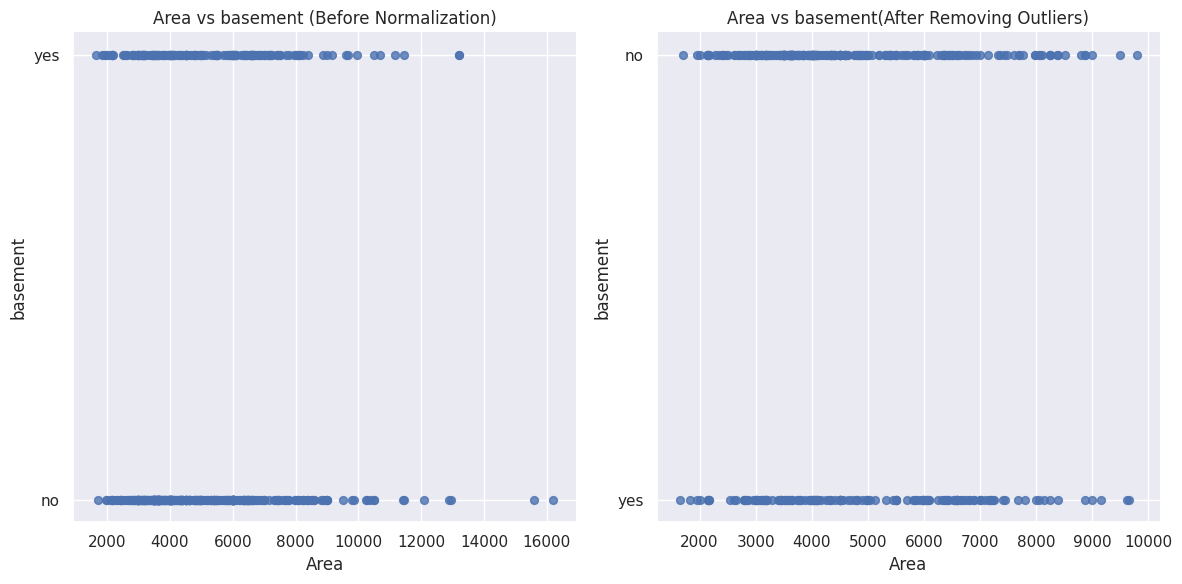

In [101]:
from matplotlib import pyplot as plt
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
df.plot(kind='scatter', x='area', y='basement', s=32, alpha=.8, ax=axes[0])
axes[0].spines[['top', 'right']].set_visible(False)
axes[0].set_xlabel('Area')
axes[0].set_ylabel('basement')
axes[0].set_title('Area vs basement (Before Normalization)')

# Plot the second scatter plot (after removing outliers)
df_norm.plot(kind='scatter', x='area', y='basement', s=32, alpha=.8, ax=axes[1])
axes[1].spines[['top', 'right']].set_visible(False)
axes[1].set_xlabel('Area')
axes[1].set_ylabel('basement')
axes[1].set_title('Area vs basement(After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

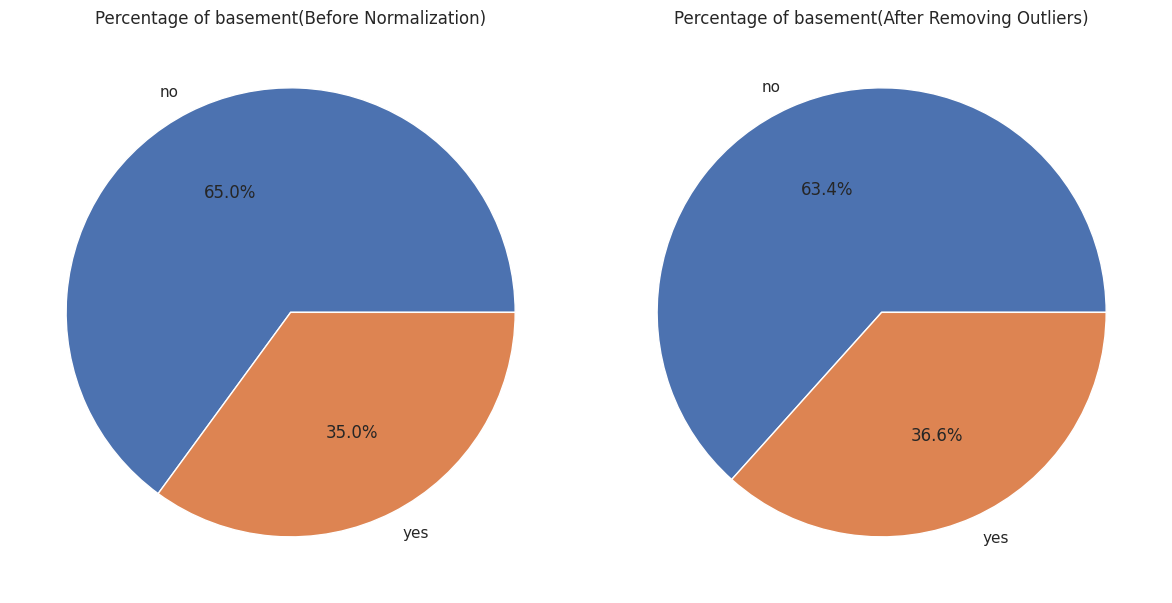

In [102]:

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['basement'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of basement(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['basement'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Percentage of basement(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [103]:
df_norm.head(5)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

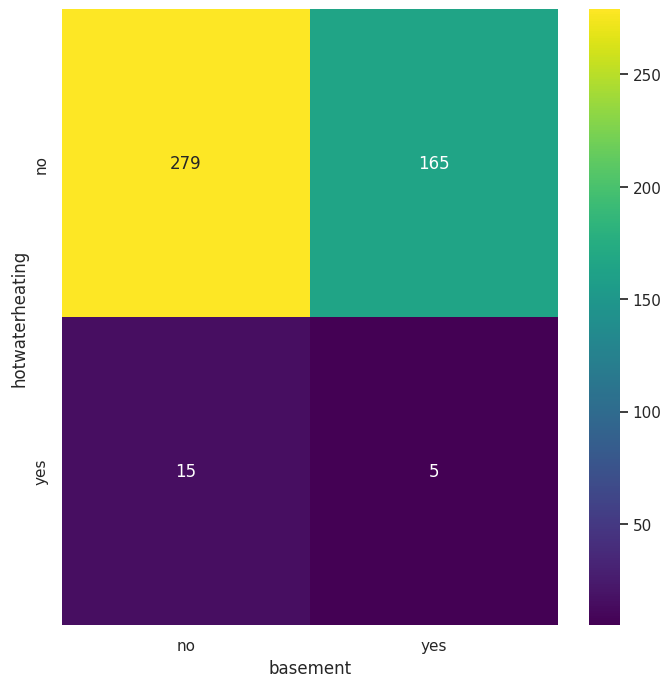

In [104]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['hotwaterheating'].value_counts()
    for x_label, grp in df_norm.groupby('basement')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('basement')
_ = plt.ylabel('hotwaterheating')

<ipython-input-105-694de6c06961>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_norm, x='price', y='basement', inner='stick', palette='Dark2')


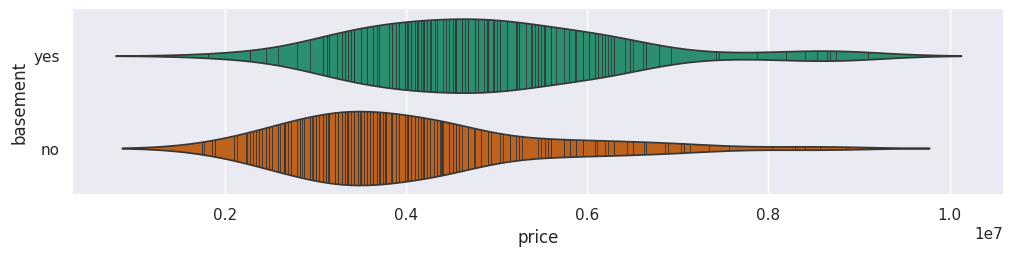

In [105]:
# @title basement vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['basement'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='price', y='basement', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

________________________________________________________________

# Hot water_Heating

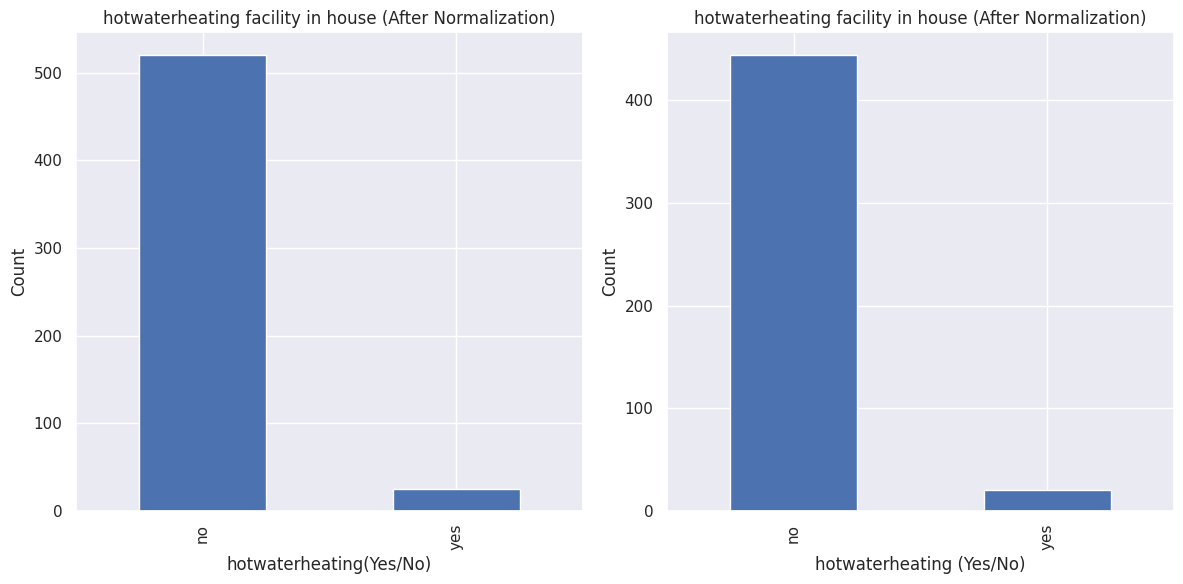

In [106]:
#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['hotwaterheating'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('hotwaterheating facility in house (After Normalization)')
axes[0].set_xlabel('hotwaterheating(Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['hotwaterheating'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('hotwaterheating facility in house (After Normalization)')
axes[1].set_xlabel('hotwaterheating (Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


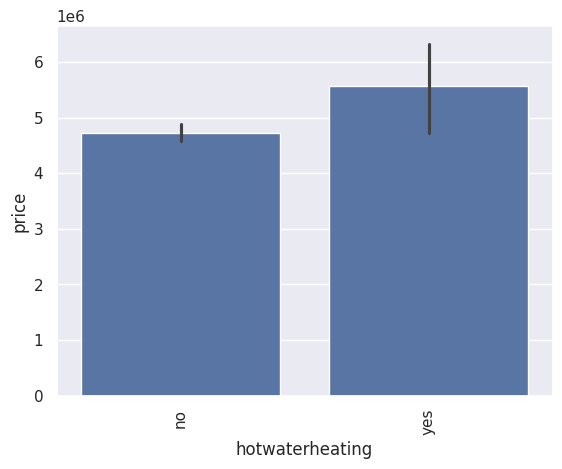

In [107]:
sns.barplot(x=df['hotwaterheating'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

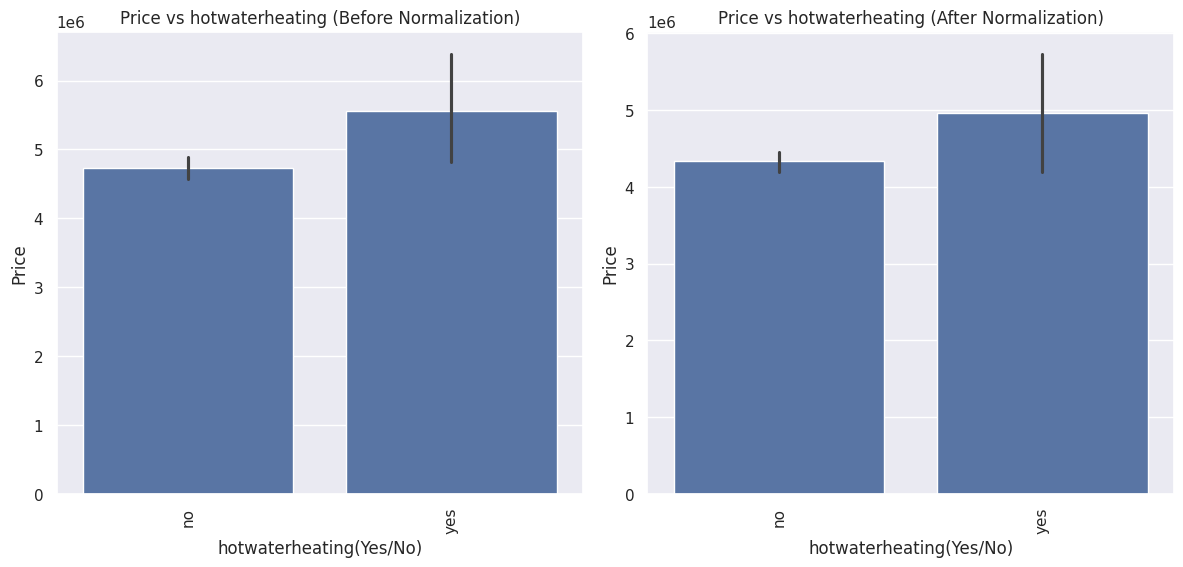

In [108]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first barplot (before normalization)
sns.barplot(x=df['hotwaterheating'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs hotwaterheating (Before Normalization)')
axes[0].set_xlabel('hotwaterheating(Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second barplot (after removing outliers)
sns.barplot(x=df_norm['hotwaterheating'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs hotwaterheating (After Normalization)')
axes[1].set_xlabel('hotwaterheating(Yes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

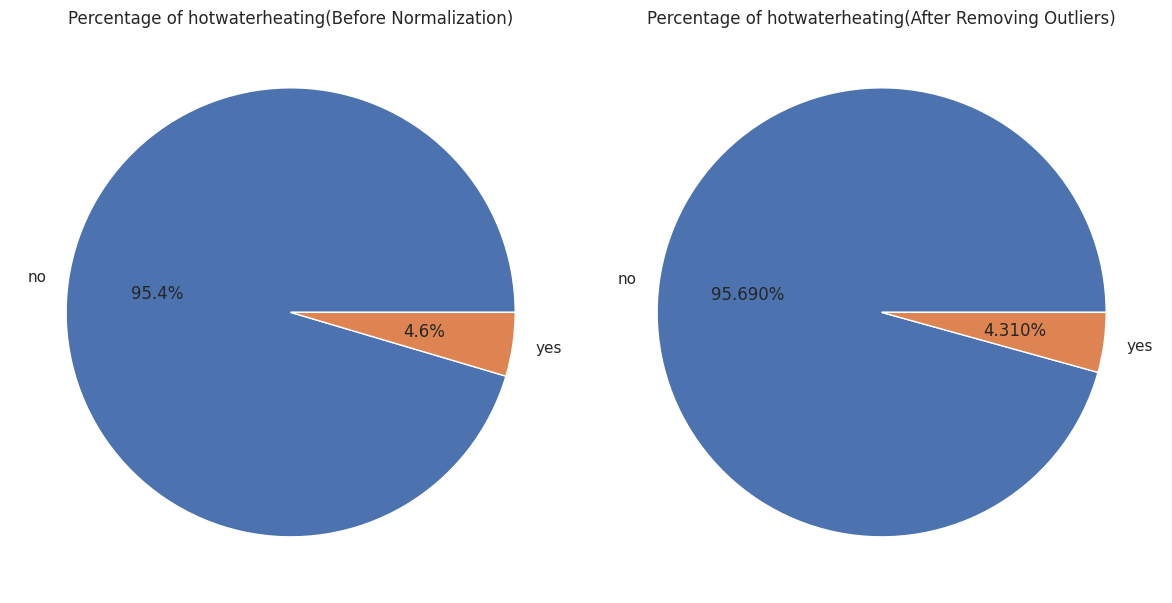

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['hotwaterheating'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of hotwaterheating(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['hotwaterheating'].value_counts().plot(kind='pie', autopct='%1.3f%%', ax=axes[1])
axes[1].set_title('Percentage of hotwaterheating(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [110]:
df_norm.head(3)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished

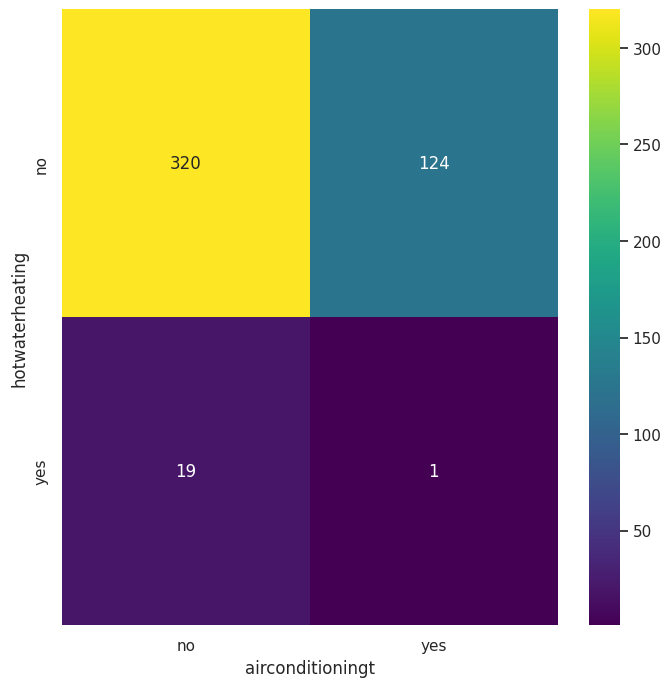

In [111]:

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['hotwaterheating'].value_counts()
    for x_label, grp in df_norm.groupby('airconditioning')
})
sns.heatmap(df_2dhist, cmap='viridis', annot=True, fmt='d')
plt.xlabel('airconditioningt')
_ = plt.ylabel('hotwaterheating')

<ipython-input-112-afd7253164e1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df_norm, x='price', y='hotwaterheating', inner='stick', palette='Dark2')


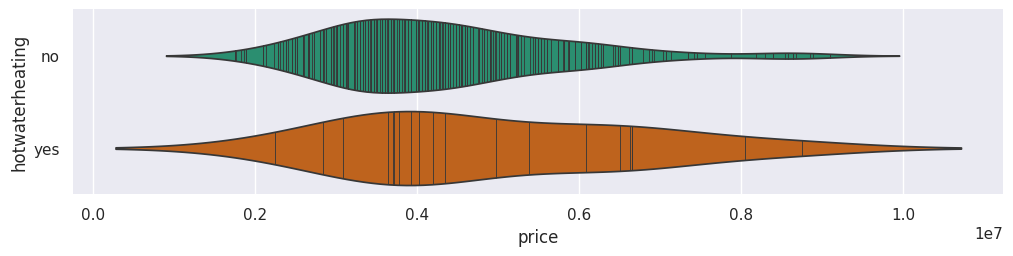

In [112]:
# @title hotwaterheating vs price

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_norm['hotwaterheating'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_norm, x='price', y='hotwaterheating', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

_____________________________________________________________

# 	Airconditioning

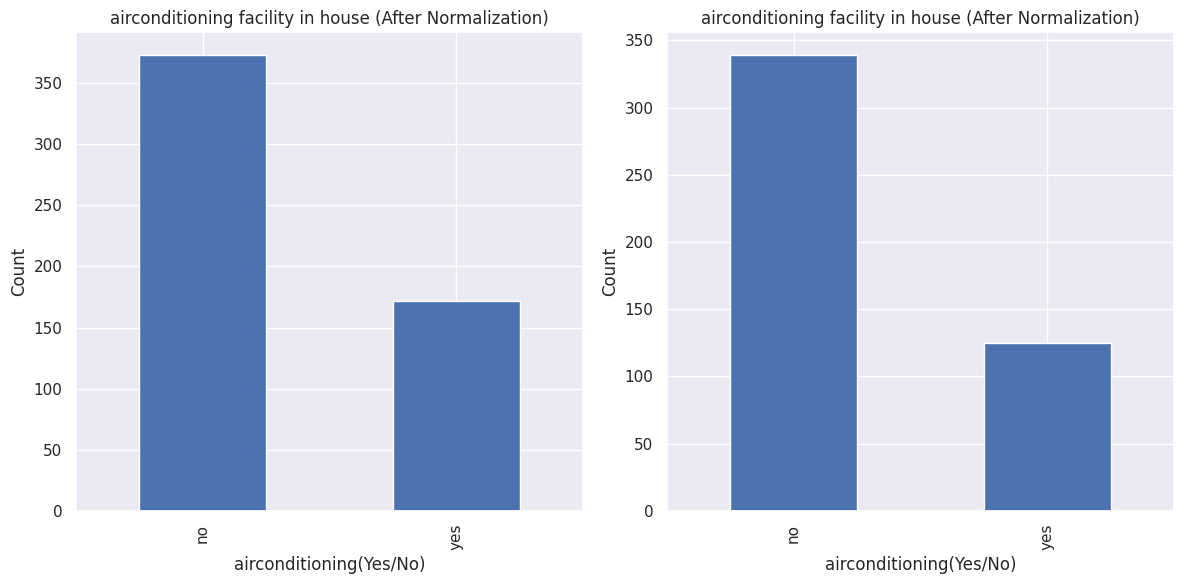

In [113]:

#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['airconditioning'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('airconditioning facility in house (After Normalization)')
axes[0].set_xlabel('airconditioning(Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['airconditioning'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('airconditioning facility in house (After Normalization)')
axes[1].set_xlabel('airconditioning(Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


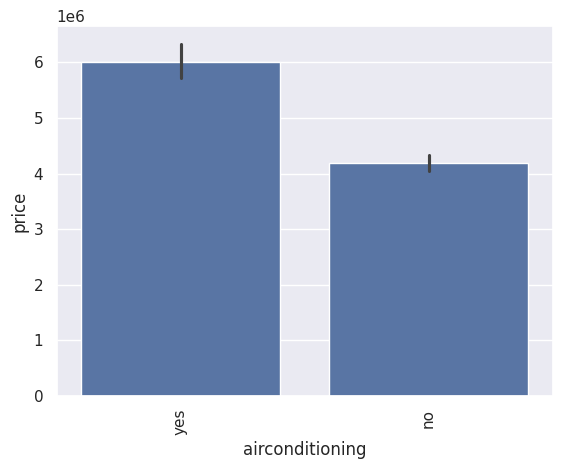

In [114]:
sns.barplot(x=df['airconditioning'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

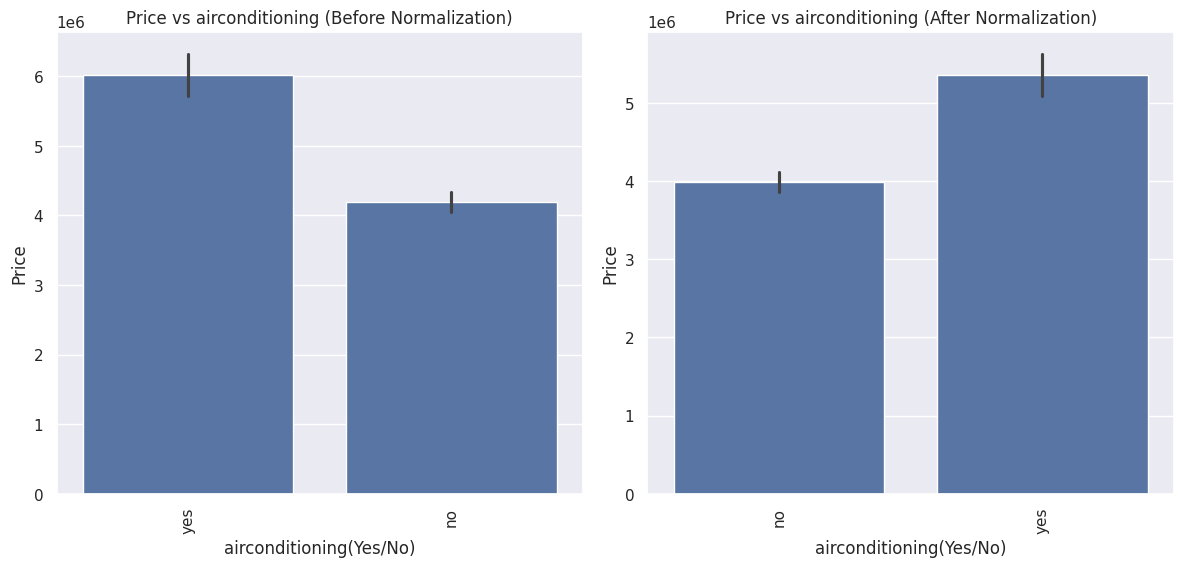

In [115]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first barplot (before normalization)
sns.barplot(x=df['airconditioning'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs airconditioning (Before Normalization)')
axes[0].set_xlabel('airconditioning(Yes/No)')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)

# Plot the second barplot (after removing outliers)
sns.barplot(x=df_norm['airconditioning'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs airconditioning (After Normalization)')
axes[1].set_xlabel('airconditioning(Yes/No)')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

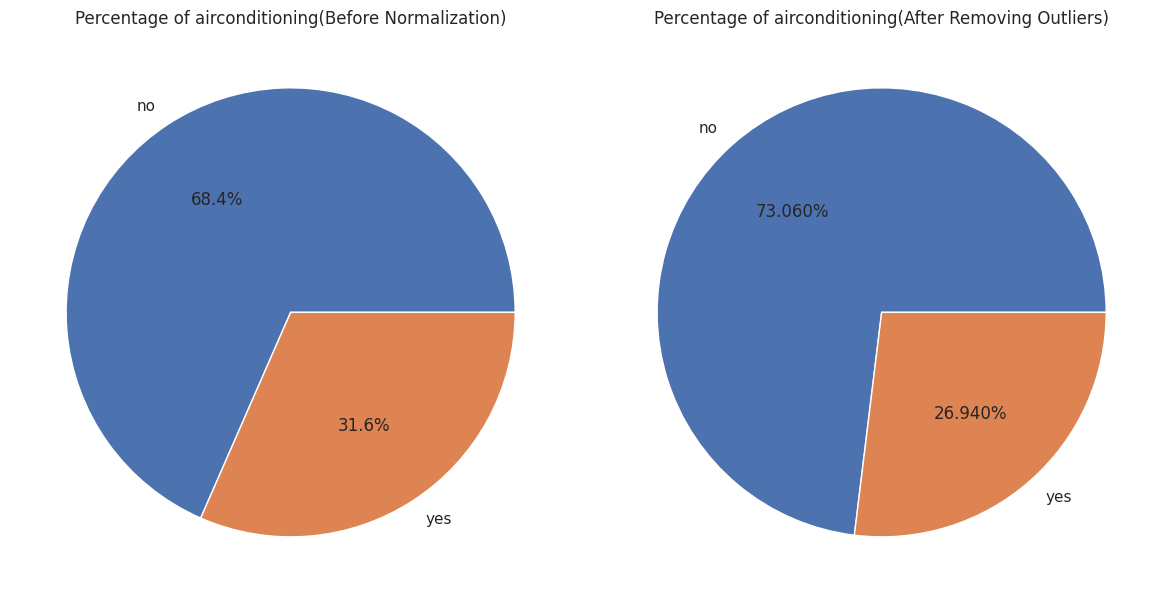

In [116]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['airconditioning'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of airconditioning(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['airconditioning'].value_counts().plot(kind='pie', autopct='%2.3f%%', ax=axes[1])
axes[1].set_title('Percentage of airconditioning(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [117]:
df_norm.head(3)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished

_______________________________________________________________

# 	parking

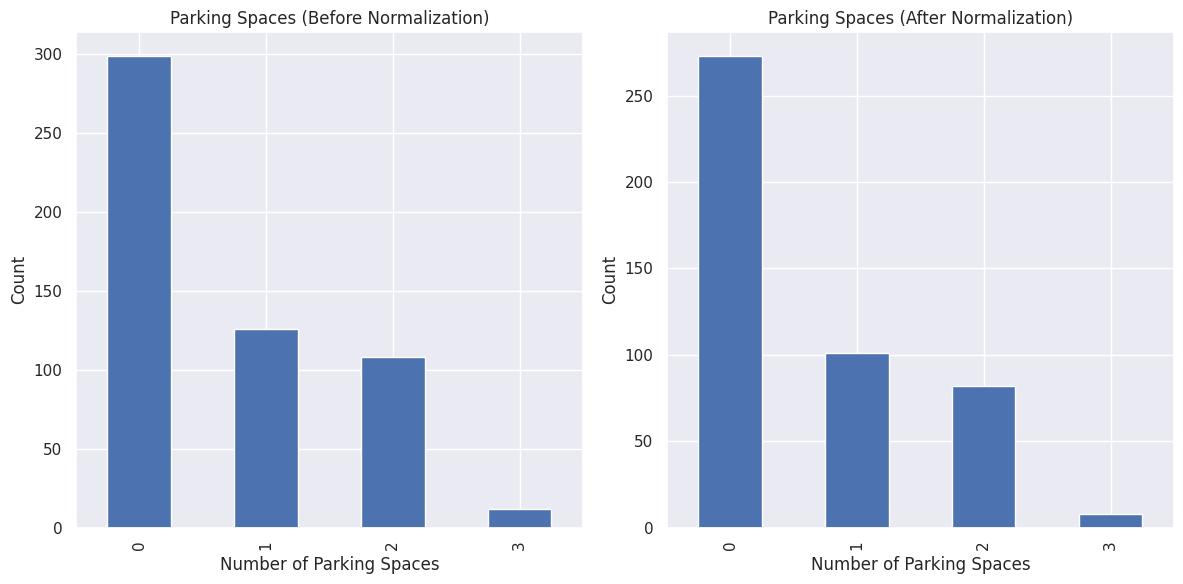

In [123]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['parking'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Parking Spaces (Before Normalization)')
axes[0].set_xlabel('Number of Parking Spaces')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['parking'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Parking Spaces (After Normalization)')
axes[1].set_xlabel('Number of Parking Spaces')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

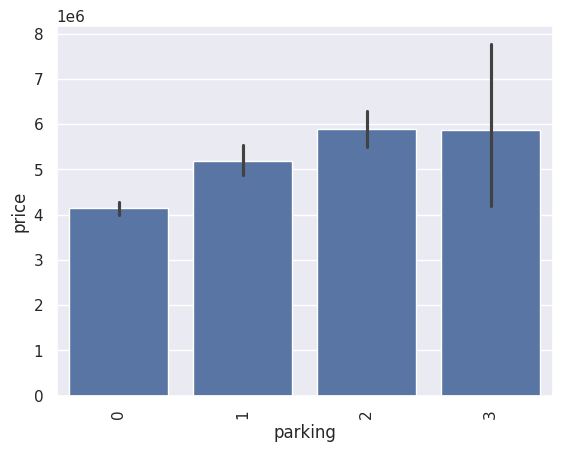

In [119]:
sns.barplot(x=df['parking'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

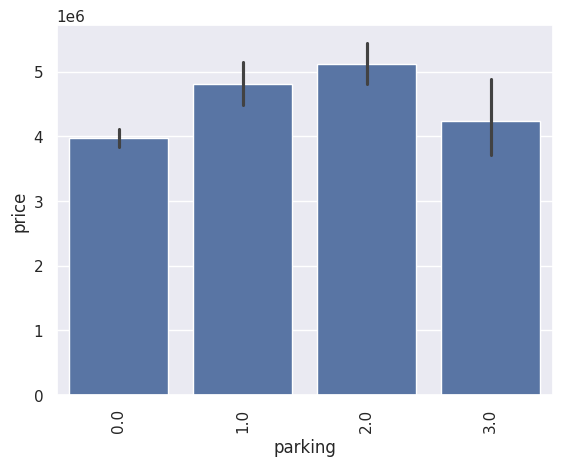

In [120]:
sns.barplot(x=df_norm['parking'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

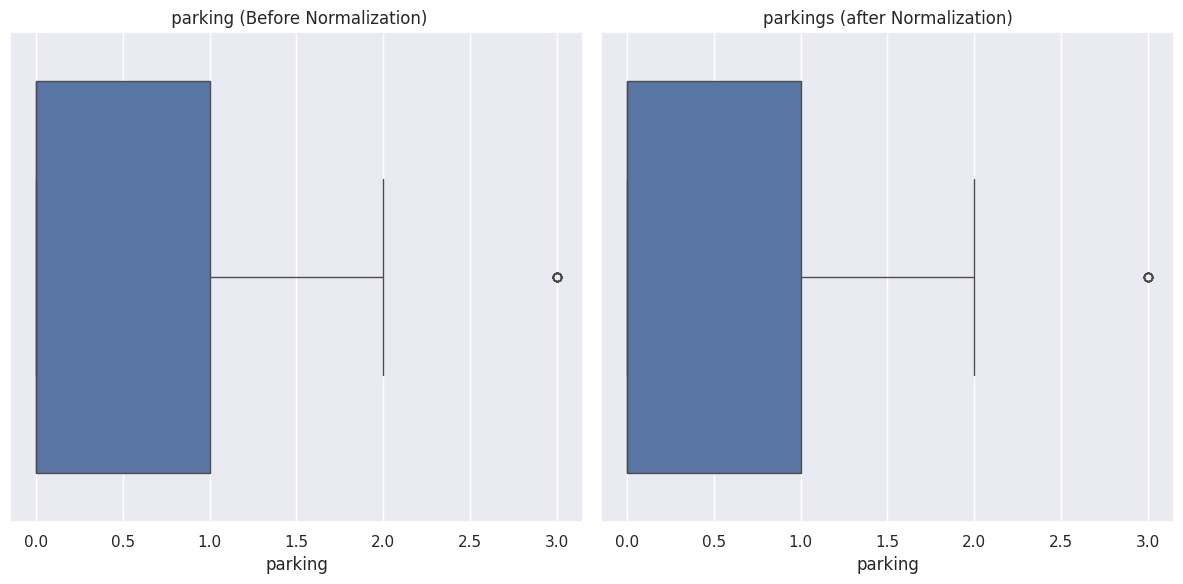

In [136]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#  bedrooms (after Normalization)
sns.boxplot(x=df['parking'], ax=axes[0])
axes[0].set_xlabel('parking')
axes[0].set_title(' parking (Before Normalization)')

#  bedrooms (after Normalization)
sns.boxplot(x=df_norm['parking'], ax=axes[1])
axes[1].set_xlabel('parking')
axes[1].set_title('parkings (after Normalization)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

<ipython-input-126-cff823e9fbc8>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['parking'], ax=axes[0])
<ipython-input-126-cff823e9fbc8>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_norm['parking'], ax=axes[1])


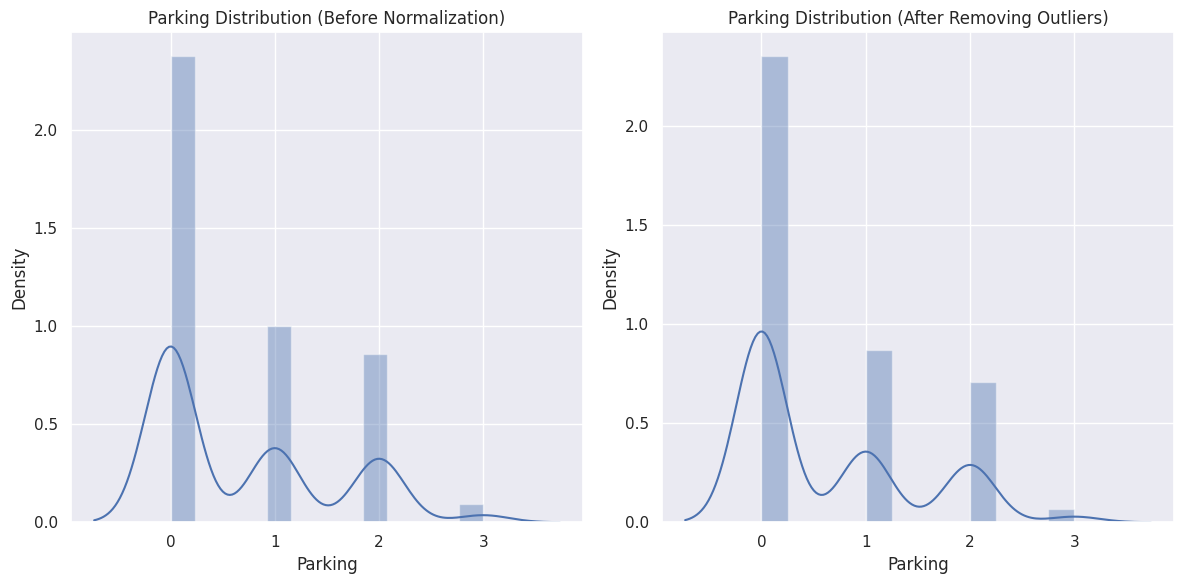

In [126]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first distribution plot (before normalization)
sns.distplot(df['parking'], ax=axes[0])
axes[0].set_xlabel('Parking')
axes[0].set_title('Parking Distribution (Before Normalization)')

# Plot the second distribution plot (after removing outliers)
sns.distplot(df_norm['parking'], ax=axes[1])
axes[1].set_xlabel('Parking')
axes[1].set_title('Parking Distribution (After Removing Outliers)')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

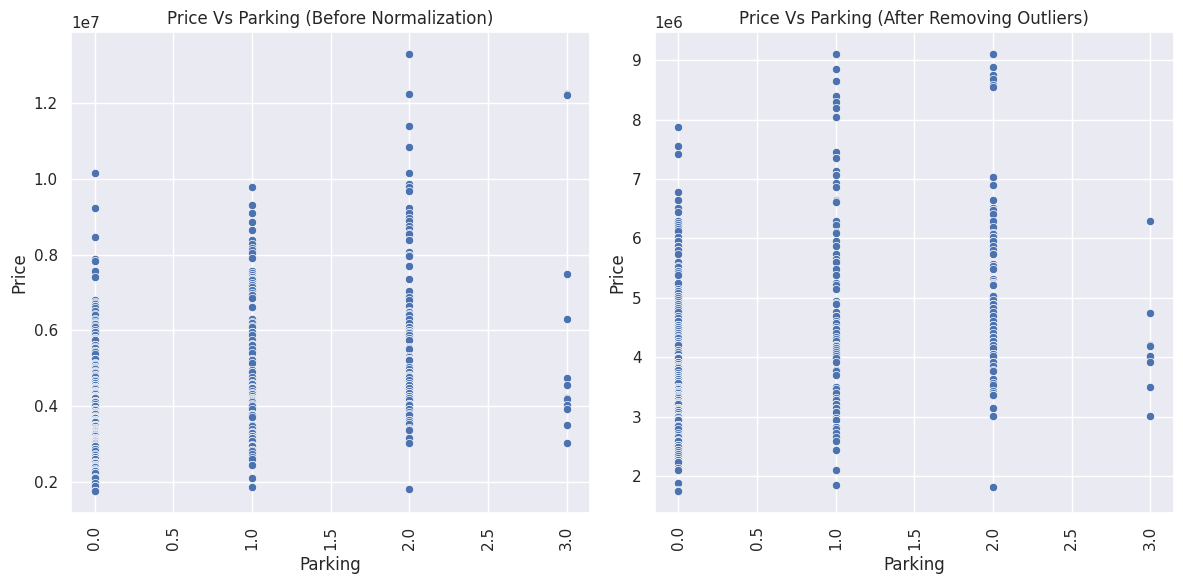

In [128]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first scatter plot (before normalization)
sns.scatterplot(x=df['parking'], y=df['price'], ax=axes[0])
axes[0].set_title('Price Vs Parking (Before Normalization)')
axes[0].set_xlabel('Parking')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot the second scatter plot (after removing outliers)
sns.scatterplot(x=df_norm['parking'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price Vs Parking (After Removing Outliers)')
axes[1].set_xlabel('Parking')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

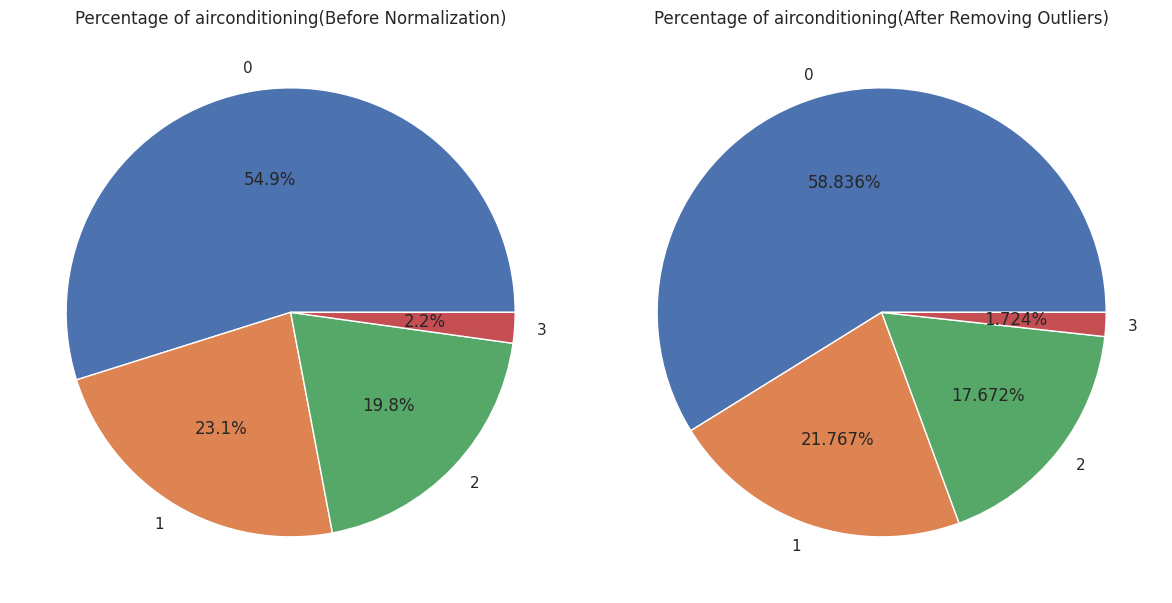

In [129]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['parking'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of parking(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['parking'].value_counts().plot(kind='pie', autopct='%2.3f%%', ax=axes[1])
axes[1].set_title('Percentage of parking(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [130]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

_______________________________________________________________

# 	prefarea

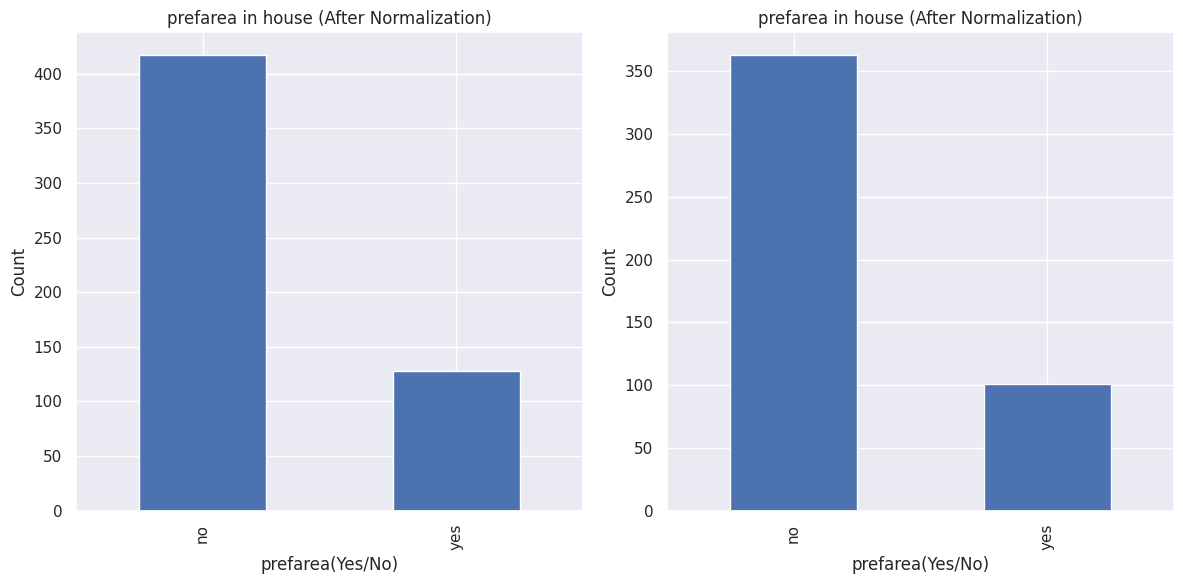

In [132]:
#Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar chart (before normalization)
df['prefarea'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('prefarea in house (After Normalization)')
axes[0].set_xlabel('prefarea(Yes/No)')
axes[0].set_ylabel('Count')

# Plot the second bar chart (after removing outliers)
df_norm['prefarea'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('prefarea in house (After Normalization)')
axes[1].set_xlabel('prefarea(Yes/No)')
axes[1].set_ylabel('Count')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


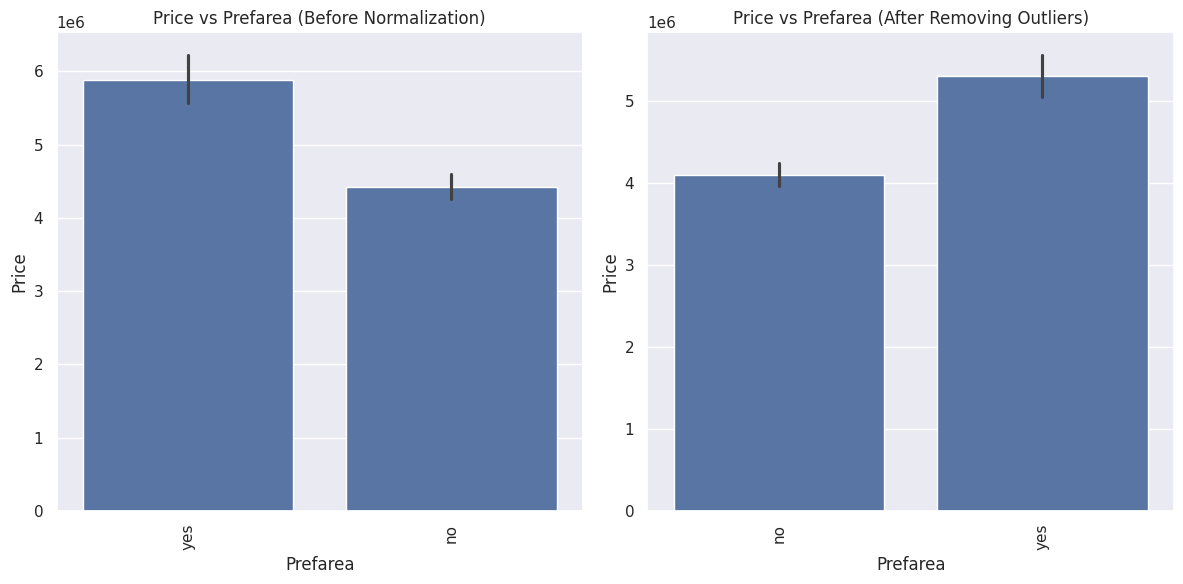

In [133]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar plot (before normalization)
sns.barplot(x=df['prefarea'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs Prefarea (Before Normalization)')
axes[0].set_xlabel('Prefarea')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot the second bar plot (after removing outliers)
sns.barplot(x=df_norm['prefarea'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs Prefarea (After Removing Outliers)')
axes[1].set_xlabel('Prefarea')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

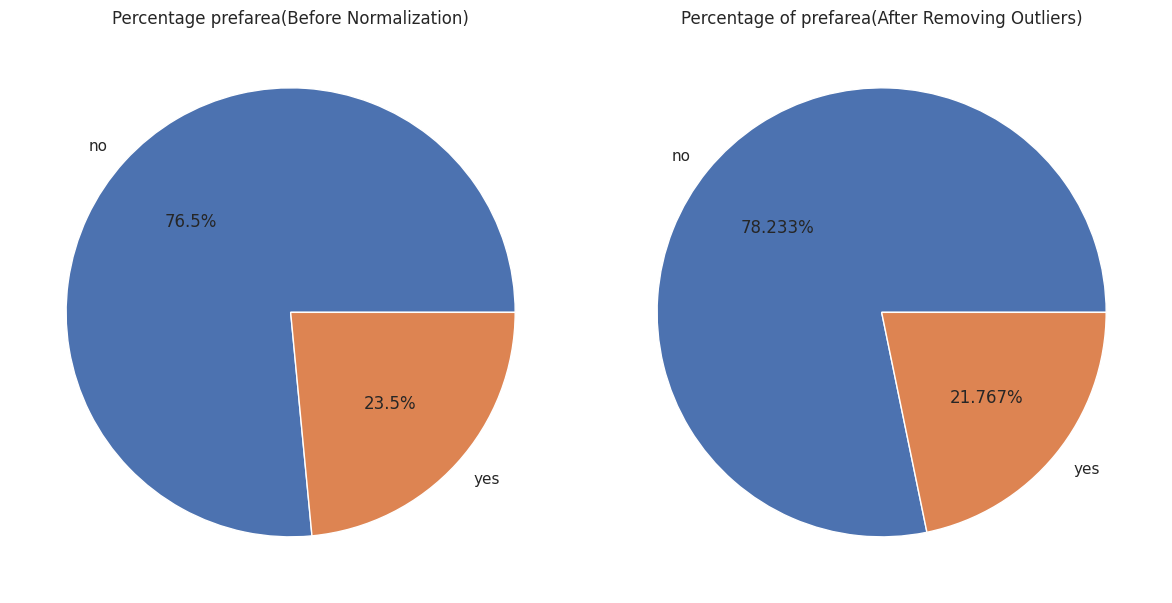

In [134]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['prefarea'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage prefarea(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['prefarea'].value_counts().plot(kind='pie', autopct='%2.3f%%', ax=axes[1])
axes[1].set_title('Percentage of prefarea(After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [135]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

______________________________________________________________

# furnishingstatus

<Axes: xlabel='furnishingstatus'>

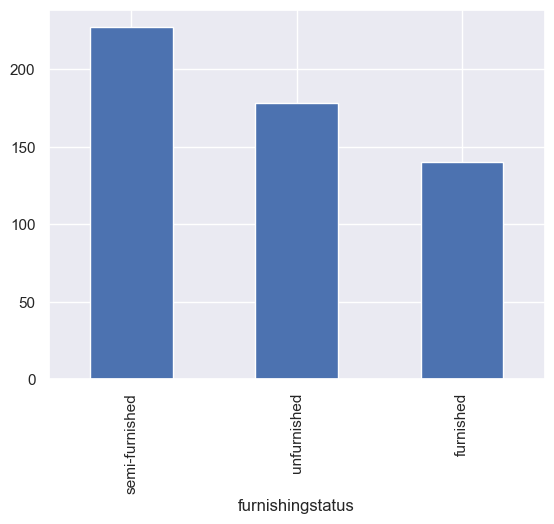

In [ ]:
df['furnishingstatus'].value_counts().plot(kind='bar')

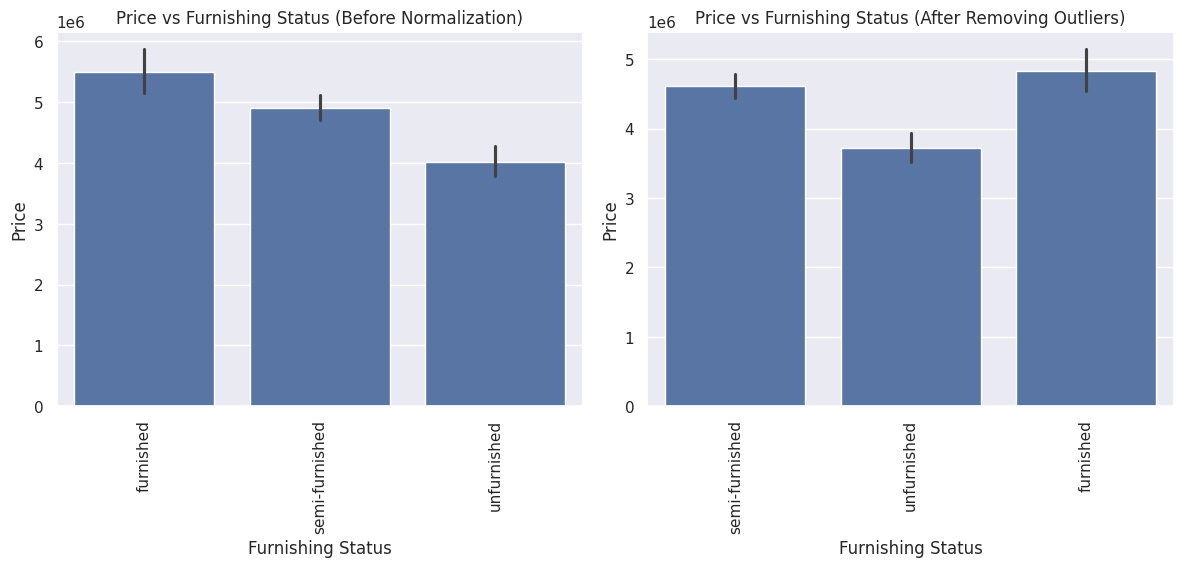

In [137]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first bar plot (before normalization)
sns.barplot(x=df['furnishingstatus'], y=df['price'], ax=axes[0])
axes[0].set_title('Price vs Furnishing Status (Before Normalization)')
axes[0].set_xlabel('Furnishing Status')
axes[0].set_ylabel('Price')
axes[0].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Plot the second bar plot (after removing outliers)
sns.barplot(x=df_norm['furnishingstatus'], y=df_norm['price'], ax=axes[1])
axes[1].set_title('Price vs Furnishing Status (After Removing Outliers)')
axes[1].set_xlabel('Furnishing Status')
axes[1].set_ylabel('Price')
axes[1].tick_params(axis='x', rotation=90)  # Rotate x-axis labels

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

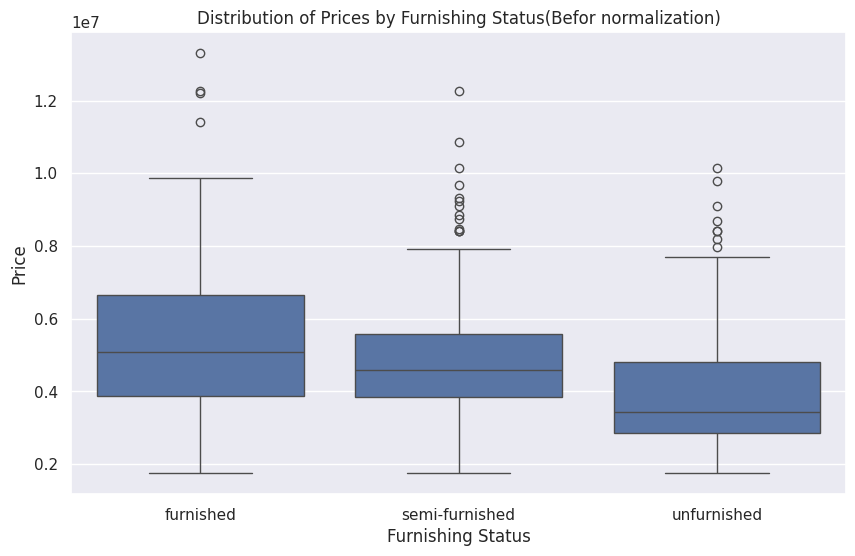

In [140]:
# @title Distribution of Prices by Furnishing Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
_ = plt.title('Distribution of Prices by Furnishing Status(Befor normalization)')

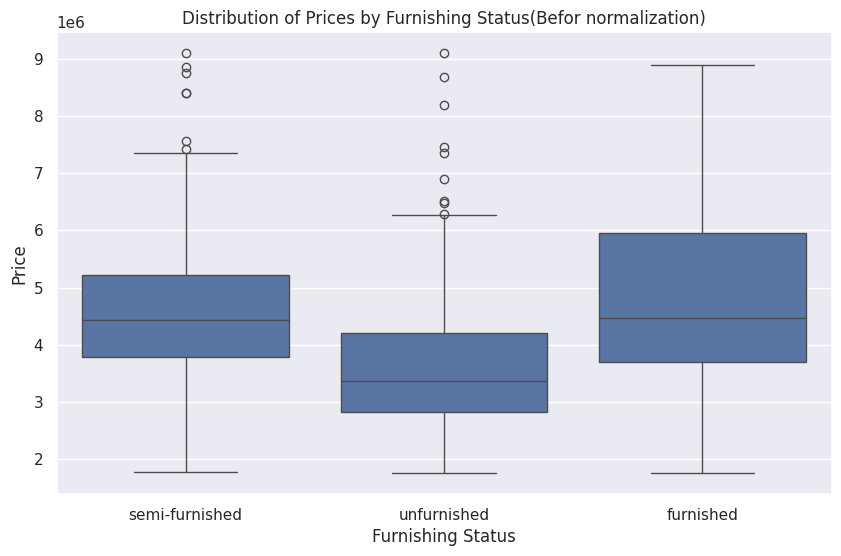

In [139]:
# @title Distribution of Prices by Furnishing Status

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df_norm)
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
_ = plt.title('Distribution of Prices by Furnishing Status(Befor normalization)')

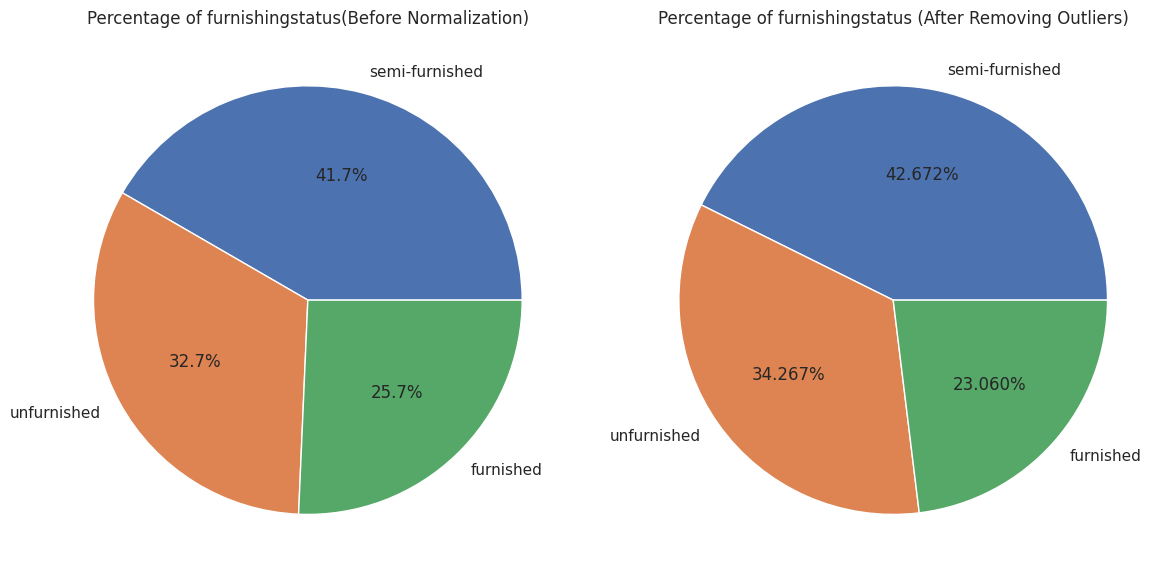

In [141]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first pie chart (before normalization)
df['furnishingstatus'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Percentage of furnishingstatus(Before Normalization)')
axes[0].set_ylabel('')

# Plot the second pie chart (after removing outliers)
df_norm['furnishingstatus'].value_counts().plot(kind='pie', autopct='%2.3f%%', ax=axes[1])
axes[1].set_title('Percentage of furnishingstatus (After Removing Outliers)')
axes[1].set_ylabel('')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [142]:
df_norm.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
15  9100000  6000         4          1        2      yes        no      yes   
16  9100000  6600         4          2        2      yes       yes      yes   
18  8890000  4600         3          2        2      yes       yes       no   
19  8855000  6420         3          2        2      yes        no       no   
20  8750000  4320         3          1        2      yes        no      yes   

   hotwaterheating airconditioning  parking prefarea furnishingstatus  
15              no              no        2       no   semi-furnished  
16              no             yes        1      yes      unfurnished  
18              no             yes        2       no        furnished  
19              no             yes        1      yes   semi-furnished  
20             yes              no        2       no   semi-furnished

________________________________________________________________

# Checking Columns Corelation by using heat

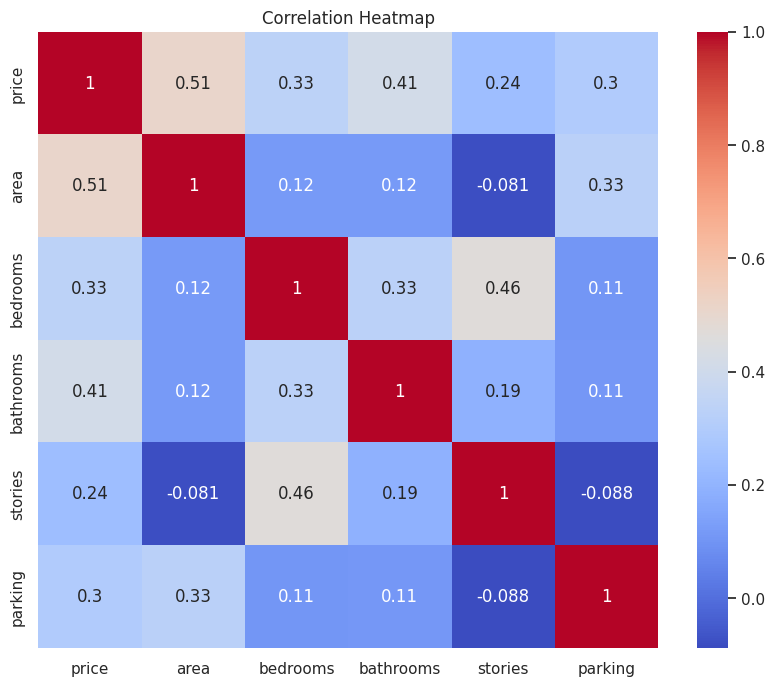

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Import pandas for data manipulation

# Select the columns for the heatmap, focusing on numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Calculate the correlation matrix using only numerical columns
correlation_matrix = df_norm[numerical_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

_____________________________________________________________

## **Regression Model**

In [237]:
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.linear_model import LinearRegression    # For linear regression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # For encoding categorical variables
from sklearn.metrics import mean_squared_error, r2_score  # Common regression metrics
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder
from sklearn.preprocessing import StandardScaler  # Import StandardScaler
from sklearn.preprocessing import MinMaxScaler  # Import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [238]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 464 entries, 15 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             464 non-null    int64
 1   area              464 non-null    int64
 2   bedrooms          464 non-null    int64
 3   bathrooms         464 non-null    int64
 4   stories           464 non-null    int64
 5   mainroad          464 non-null    int64
 6   guestroom         464 non-null    int64
 7   basement          464 non-null    int64
 8   hotwaterheating   464 non-null    int64
 9   airconditioning   464 non-null    int64
 10  parking           464 non-null    int64
 11  prefarea          464 non-null    int64
 12  furnishingstatus  464 non-null    int64
dtypes: int64(13)
memory usage: 66.9 KB


In [239]:
encoder = LabelEncoder()

In [240]:
encode_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
for col in encode_columns:
    df_norm[col] = encoder.fit_transform(df_norm[col])

In [194]:
df_norm.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
15  9100000  6000         4          1        2         1          0   
16  9100000  6600         4          2        2         1          1   
18  8890000  4600         3          2        2         1          1   
19  8855000  6420         3          2        2         1          0   
20  8750000  4320         3          1        2         1          0   

    basement  hotwaterheating  airconditioning  parking  prefarea  \
15         1                0                0        2         0   
16         1                0                1        1         1   
18         0                0                1        2         0   
19         0                0                1        1         1   
20         1                1                0        2         0   

    furnishingstatus  
15                 1  
16                 2  
18                 0  
19                 1  
20                 1

In [241]:
x = df_norm.drop('price', axis=1)
y = df_norm['price']

In [242]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y.values.reshape(-1, 1))

In [243]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [244]:
In_model = LinearRegression()
In_model.fit(x_train, y_train)

LinearRegression()

In [245]:
y_pred = In_model.predict(x_test)

In [246]:
y_pred

array([[0.79040069],
       [0.49035175],
       [0.45036054],
       [0.36417036],
       [0.20448434],
       [0.28487884],
       [0.43288663],
       [0.27350381],
       [0.54893013],
       [0.15085847],
       [0.3110752 ],
       [0.24595402],
       [0.2335689 ],
       [0.16248379],
       [0.25015379],
       [0.50815276],
       [0.29175985],
       [0.49158939],
       [0.35538544],
       [0.40236953],
       [0.56418651],
       [0.33183155],
       [0.33917181],
       [0.42155158],
       [0.4582989 ],
       [0.44241975],
       [0.52886396],
       [0.53405638],
       [0.57247771],
       [0.41686272],
       [0.39554519],
       [0.70504384],
       [0.09138604],
       [0.37296074],
       [0.30704793],
       [0.23206533],
       [0.44926905],
       [0.11162473],
       [0.60405706],
       [0.35066413],
       [0.26546961],
       [0.2639495 ],
       [0.19682642],
       [0.21141928],
       [0.21694516],
       [0.64995072],
       [0.40080322],
       [0.145

In [247]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [233]:
mse


0.020106165520489227

In [234]:
mae

0.104119260899259

In [250]:
In_acc = r2_score(y_test, y_pred)

In [251]:
In_acc

0.6124849265248378

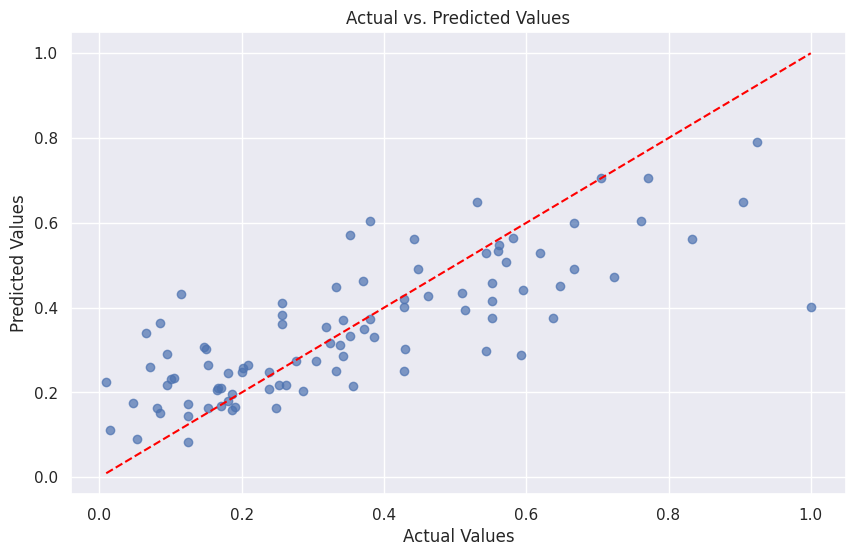

In [235]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already available from your previous code

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)  # Plot actual vs. predicted
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

plt.show()

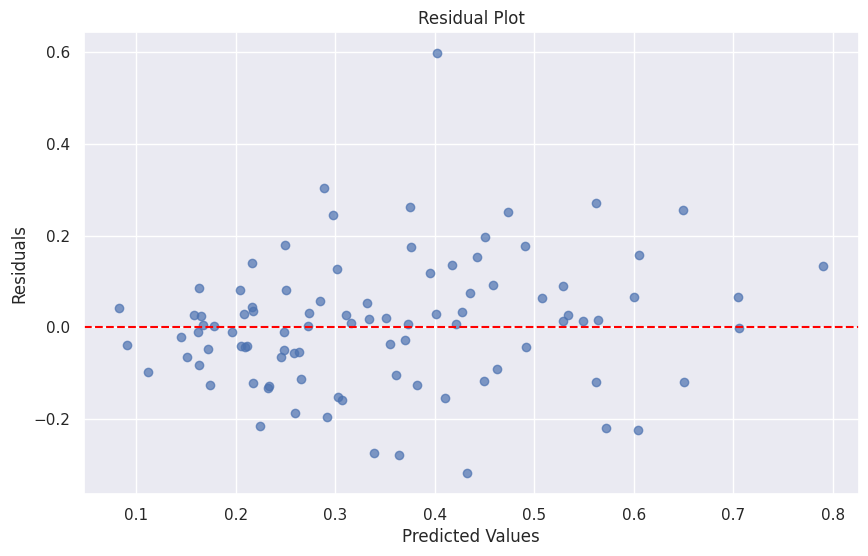

In [236]:
import matplotlib.pyplot as plt

# Calculate residuals
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.7)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at zero

plt.show()

# Conclusion:
**insights**
**Mean Squared Error (MSE): 0.0201**

MSE measures the average squared difference between your model's predictions and the actual values.
A lower MSE indicates a better fit. However, the ideal MSE depends on the scale of your target variable.
Here MSE of 0.0201 suggests that, on average, the squared errors of your model's predictions are relatively small.

**Mean Absolute Error (MAE): 0.1041**

MAE measures the average absolute difference between your model's predictions and the actual values.

Here MAE of 0.1041 means that, on average, your model's predictions are off by about 0.1041 units.

**R-squared (R2): 0.6125**

R-squared represents the proportion of variance in the target variable explained by your model.
It ranges from 0 to 1, with higher values indicating a better fit.
An R-squared of 0.6125 means that your model explains about 61.

**Accuracy** 61%
Quite better not under fit nor over fit.


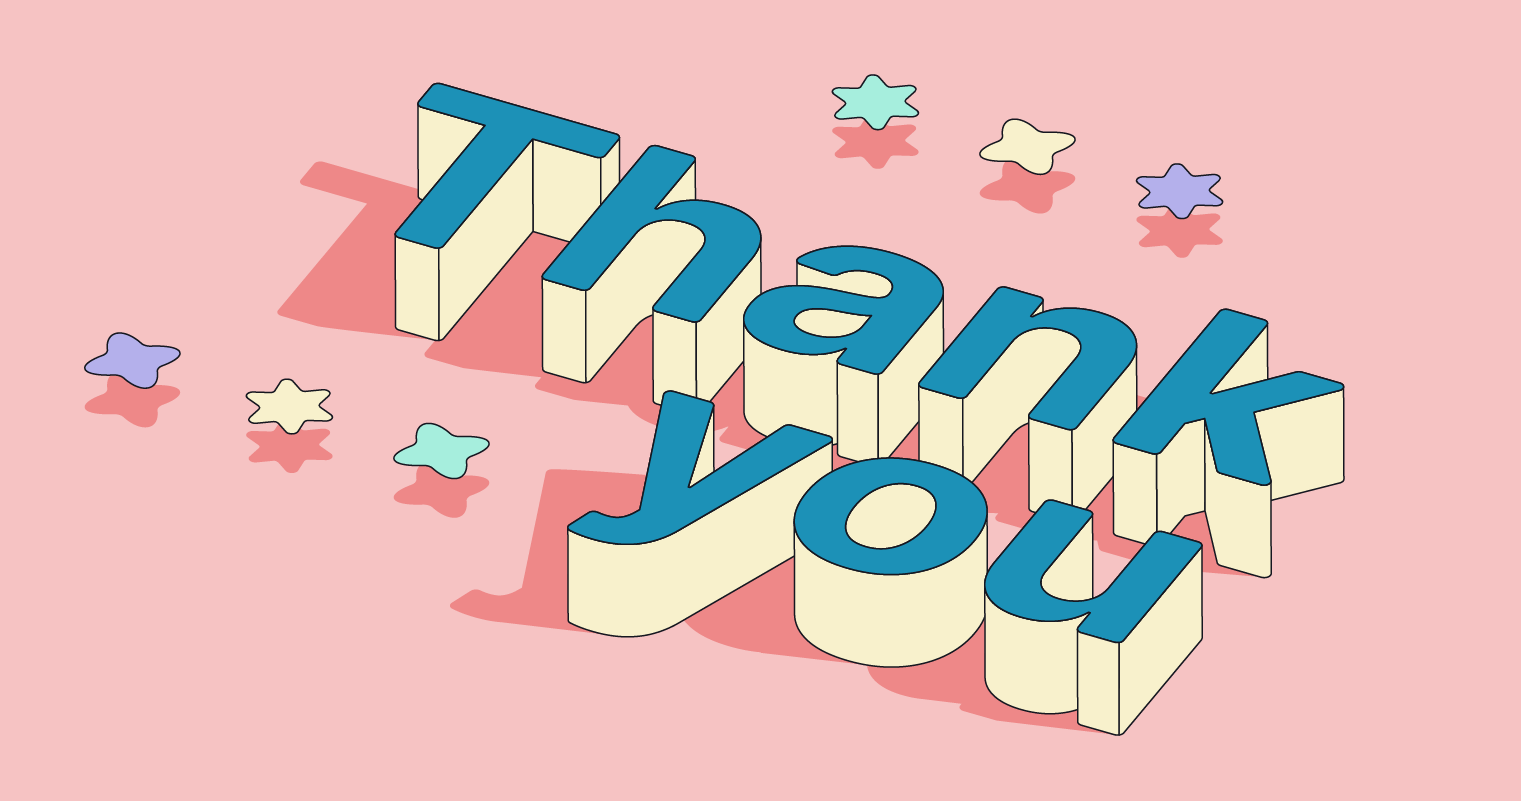